# **ENVIRONMENT SET-UP**

In [118]:
import numpy as np
import pandas as pd
import missingno as msno
import os
import math
from scipy.io import arff
from sklearn import preprocessing
from numpy import mean

# Imbalanced data
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks

# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import SequentialFeatureSelector
import statsmodels.api as sm

# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier

# Visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install mlxtend

Importing the dataset into the environment


#### **Dataset Introduction**

The second dataset is from a study titled *‘Risk Factor Prediction of Chronic Kidney Disease based on Machine Learning Algorithms’*, which contains two hundred and two (202) patient observations and twenty-nine (29) attributes. 

It was submitted by Nayeem Ahmed, a Medical Administrative at Enam Medical College in Bangladesh and created by the research scholar of Diu Journal Analytica R & D Lab Md. Ashiqul Islam in Bangladesh to the UCI Machine Learning Repository.

In [3]:
# load the dataset with pandas read_csv function
kidney_data = pd.read_csv(r"C:/Users/vanes/OneDrive/Data Science Project/Bangladesh Dataset/ckd-dataset-v2.csv")

Dataset column information is as follows;

- Blood pressure diastolic	0/1
- Blood pressure limit	0, 1, 2
- Specific gravity	Range: 1.007 ≥ sg ≥ 1.023
- Albumin	Range: 0 ≥ al ≥ 4
- Class	ckd/not ckd
- Red blood cells	0/1
- Sugar	Range:  0 ≥ su ≥ 4
- Pus cell	0/1
- Pus cell clumps	0/1
- Bacteria	0/1
- Blood glucose random	Range: 112 ≥ bgr ≥ 448 (mg/dL)
- Blood urea	Range: 48.1 ≥ bu ≥ 352.9 (mg/dL)
- Serum creatinine	Range: 3.65 ≥ scr ≥28.85 (mg/dL)
- Sodium	Range: 118 ≥ sod ≥ 158 (mEq/L)
- Potassium	Range: 7.31 ≥ pot ≥ 42.59 (mEq/L)
- Hemoglobin	Range: 6.1 ≥ hemo ≥ 16.5
- Packed cell volume	Range: 17.9 ≥ pcv ≥ 49.1 (%)
- Red blood cell count	Range: 2.69 ≥ rbcc ≥ 7.41 (million cells/mcL)
- White blood cell count	Range: 4,980 ≥ wbcc ≥ 24,020 (cells/mcL)
- Hypertension	0/1
- Diabetes mellitus	0/1
- Coronary artery disease	0/1
- Appetite	0/1
- Pedal edema	0/1
- Anemia	0/1
- Glomerular Filtration Rate	Range:  26.6175 ≥ gfr ≥ 227.944 (mL/min/1.73 m2)
- Stage	s1, s2, s3, s4, s5
- Affected	0/1
- Age	Range: 12 ≥ age ≥ 74



# **EXPLORATORY DATA ANALYSIS**

In [4]:
kidney_data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
bp (Diastolic),discrete,NaN,0,0,0,1,0,1,0,0
bp limit,discrete,NaN,0,0,0,1,0,1,0,0
sg,discrete,NaN,1.019 - 1.021,1.009 - 1.011,1.009 - 1.011,1.009 - 1.011,1.015 - 1.017,≥ 1.023,1.019 - 1.021,1.019 - 1.021
al,discrete,NaN,1 - 1,< 0,≥ 4,3 - 3,< 0,< 0,3 - 3,< 0
class,discrete,NaN,ckd,ckd,ckd,ckd,ckd,notckd,ckd,ckd
rbc,discrete,NaN,0,0,1,0,0,0,0,0
su,discrete,NaN,< 0,< 0,< 0,< 0,< 0,< 0,< 0,< 0
pc,discrete,NaN,0,0,1,0,0,0,0,0
pcc,discrete,NaN,0,0,0,0,0,0,0,0
ba,discrete,NaN,0,0,1,0,0,0,0,0


In [5]:
# edit the column names for easier readability
kidney_data.columns = ['blood_pressure', 'blood_pressure_limit', 'specific_gravity', 'albumin', 'class', 'red_blood_cells', 'sugar', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'sodium', 'serum_creatinine',
              'potassium', 'hemoglobin', 'packed_cell_volume', 'red_blood_cell_count', 'white_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anemia','glomerular_filtration_rate', 'stage', 'affected', 'age']

In [6]:
kidney_data.info() # to obtain a concise summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   blood_pressure              201 non-null    object
 1   blood_pressure_limit        201 non-null    object
 2   specific_gravity            201 non-null    object
 3   albumin                     201 non-null    object
 4   class                       201 non-null    object
 5   red_blood_cells             201 non-null    object
 6   sugar                       201 non-null    object
 7   pus_cell                    201 non-null    object
 8   pus_cell_clumps             201 non-null    object
 9   bacteria                    201 non-null    object
 10  blood_glucose_random        201 non-null    object
 11  blood_urea                  201 non-null    object
 12  sodium                      201 non-null    object
 13  serum_creatinine            201 non-null    object

In [7]:
# obtain some summary statistics of the columns to gauge the data quality such as missing data
kidney_data.describe(include="all").transpose()

,count,unique,top,freq
blood_pressure,201,3,1,108
blood_pressure_limit,201,4,0,95
specific_gravity,201,6,1.019 - 1.021,75
albumin,201,6,< 0,116
class,201,3,ckd,128
red_blood_cells,201,3,0,175
sugar,201,7,< 0,170
pus_cell,201,3,0,155
pus_cell_clumps,201,3,0,173
bacteria,201,3,0,189


In [8]:
# Percentage of missing data per column
(kidney_data.isnull().sum() / kidney_data.shape[0] * 100.00).round(2)

blood_pressure                0.5
blood_pressure_limit          0.5
specific_gravity              0.5
albumin                       0.5
class                         0.5
red_blood_cells               0.5
sugar                         0.5
pus_cell                      0.5
pus_cell_clumps               0.5
bacteria                      0.5
blood_glucose_random          0.5
blood_urea                    0.5
sodium                        0.5
serum_creatinine              0.5
potassium                     0.5
hemoglobin                    0.5
packed_cell_volume            0.5
red_blood_cell_count          0.5
white_blood_cell_count        0.5
hypertension                  0.5
diabetes_mellitus             0.5
coronary_artery_disease       0.5
appetite                      0.5
pedal_edema                   0.5
anemia                        0.5
glomerular_filtration_rate    0.5
stage                         0.5
affected                      0.0
age                           0.0
dtype: float64

In [9]:
kidney_data.shape

(202, 29)

Most columns, at least 27 out of 29 columns have missing data no greater than 0.5% include 

The missing data can be dealt with in the following three different ways;
* All the rows with missing data can be eliminated
* All the columns with a lot of missing data can be eliminated
* The missing data can be replaced through various imputation ways either replacing the values with mean or mode or using k-nearest neighbour to replace the data values with similar computed values based on similarity and nearness.

<AxesSubplot:>

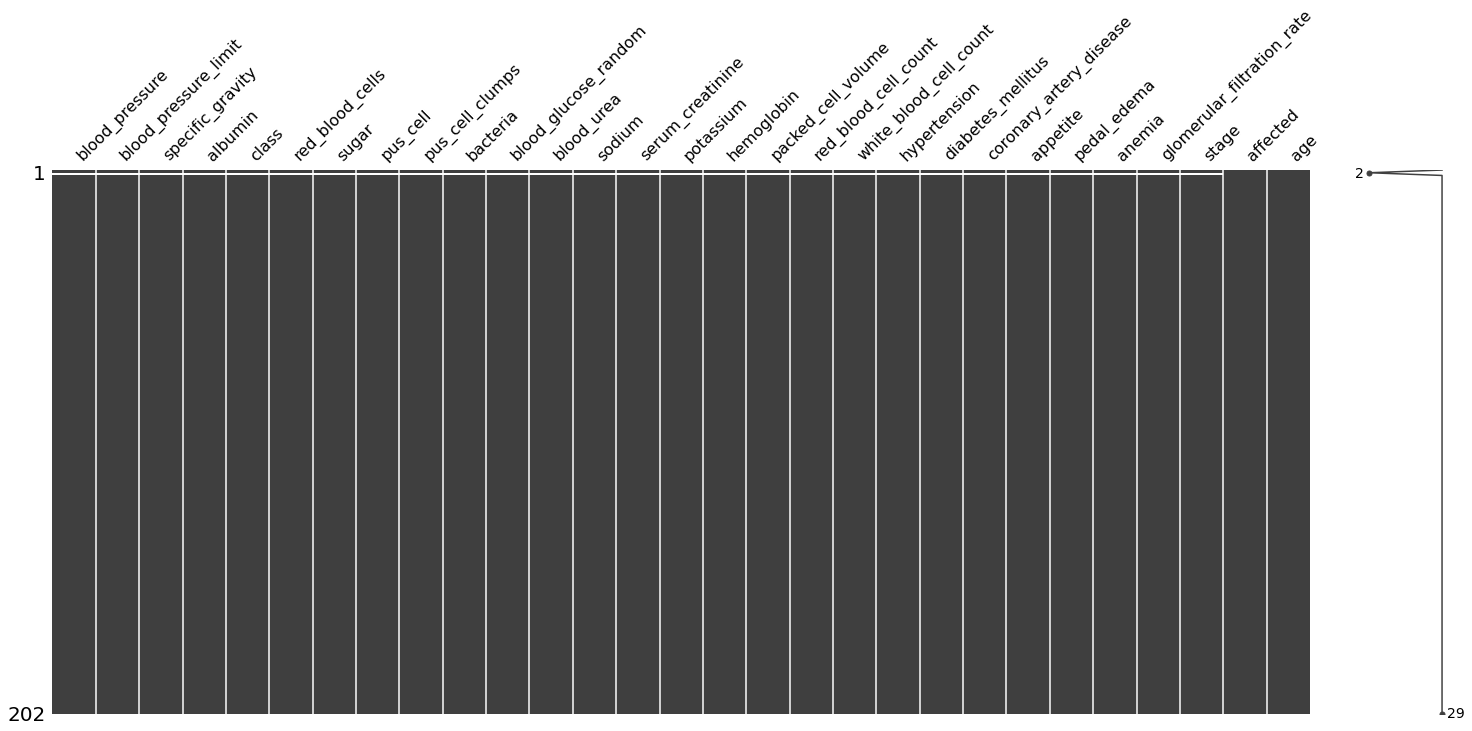

In [10]:
# Visualizing the missing data using a matrix display image
msno.matrix(kidney_data)

In [11]:
kidney_data.head()

,blood_pressure,blood_pressure_limit,specific_gravity,albumin,class,red_blood_cells,sugar,pus_cell,pus_cell_clumps,bacteria,...,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,glomerular_filtration_rate,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [12]:
for x in kidney_data:
    print('\nUnique Values in {} has\n{} '.format(x,kidney_data[x].value_counts()))
    print('\n')


Unique Values in blood_pressure has
1           108
0            92
discrete      1
Name: blood_pressure, dtype: int64 



Unique Values in blood_pressure_limit has
0           95
1           59
2           46
discrete     1
Name: blood_pressure_limit, dtype: int64 



Unique Values in specific_gravity has
1.019 - 1.021    75
1.009 - 1.011    45
≥ 1.023          41
1.015 - 1.017    36
< 1.007           3
discrete          1
Name: specific_gravity, dtype: int64 



Unique Values in albumin has
< 0         116
2 - 2        27
3 - 3        23
1 - 1        21
≥ 4          13
discrete      1
Name: albumin, dtype: int64 



Unique Values in class has
ckd         128
notckd       72
discrete      1
Name: class, dtype: int64 



Unique Values in red_blood_cells has
0           175
1            25
discrete      1
Name: red_blood_cells, dtype: int64 



Unique Values in sugar has
< 0         170
2 - 2         9
3 - 4         8
4 - 4         6
1 - 2         6
discrete      1
≥ 4           1
Name

In [13]:
kidney_data.drop(kidney_data.index[0], inplace=True)
kidney_data.drop(kidney_data.index[0], inplace=True)
kidney_data.head()

,blood_pressure,blood_pressure_limit,specific_gravity,albumin,class,red_blood_cells,sugar,pus_cell,pus_cell_clumps,bacteria,...,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,glomerular_filtration_rate,stage,affected,age
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
5,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
6,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [14]:
# Percentage of missing data per column
(kidney_data.isnull().sum() / kidney_data.shape[0] * 100.00).round(2)

blood_pressure                0.0
blood_pressure_limit          0.0
specific_gravity              0.0
albumin                       0.0
class                         0.0
red_blood_cells               0.0
sugar                         0.0
pus_cell                      0.0
pus_cell_clumps               0.0
bacteria                      0.0
blood_glucose_random          0.0
blood_urea                    0.0
sodium                        0.0
serum_creatinine              0.0
potassium                     0.0
hemoglobin                    0.0
packed_cell_volume            0.0
red_blood_cell_count          0.0
white_blood_cell_count        0.0
hypertension                  0.0
diabetes_mellitus             0.0
coronary_artery_disease       0.0
appetite                      0.0
pedal_edema                   0.0
anemia                        0.0
glomerular_filtration_rate    0.0
stage                         0.0
affected                      0.0
age                           0.0
dtype: float64

In [15]:
# obtain some summary statistics of the columns to gauge the data quality such as missing data
kidney_data.describe(include="all").transpose()

,count,unique,top,freq
blood_pressure,200,2,1,108
blood_pressure_limit,200,3,0,95
specific_gravity,200,5,1.019 - 1.021,75
albumin,200,5,< 0,116
class,200,2,ckd,128
red_blood_cells,200,2,0,175
sugar,200,6,< 0,170
pus_cell,200,2,0,155
pus_cell_clumps,200,2,0,173
bacteria,200,2,0,189


Visualizing the descriptive features

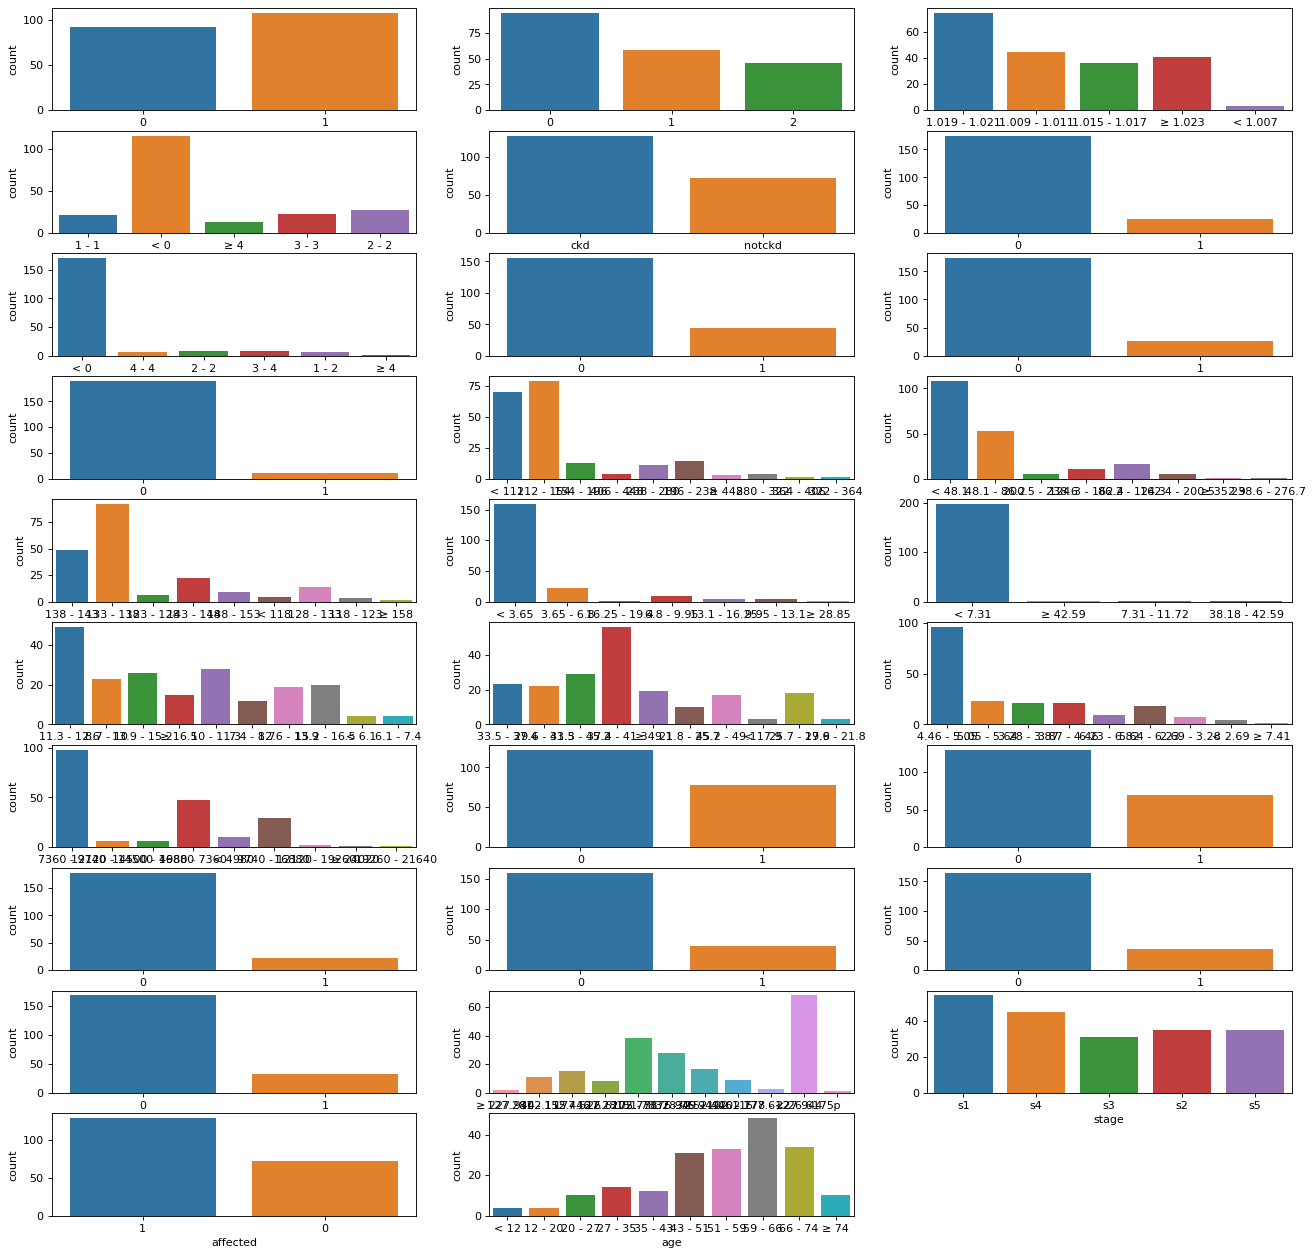

In [16]:
plt.figure(figsize=(20,20), dpi=80)

for i,feature in enumerate(kidney_data):
    plt.subplot(10,3,i+1)
    sns.countplot(kidney_data[feature])

**Blood pressure and Blood pressure limit** 

The blood pressure variables was confusing at first. However, it may mean that the two variables in indicate if the patient has blood pressure as in 0 for no and 1 for yes, and the blood pressure limit variable may indicate the stage of hypertension that the patient has.

Therefore, representation of values can either be;

Blood Pressure (Diastolic): 0 - Stage 1 hypertension (80-89), 1 - Stage 2 hypertension (90 or higher)

Blood Pressure Limit: 0 - Elevated (120-129), 1 - Stage 1 hypertension (130-139), 2 - Stage 2 hypertension (140 or higher)

#### **ELSE**

The blood pressure values relate to the systolic and diastolic value ranges in this sense. Which is similar to the first assumption



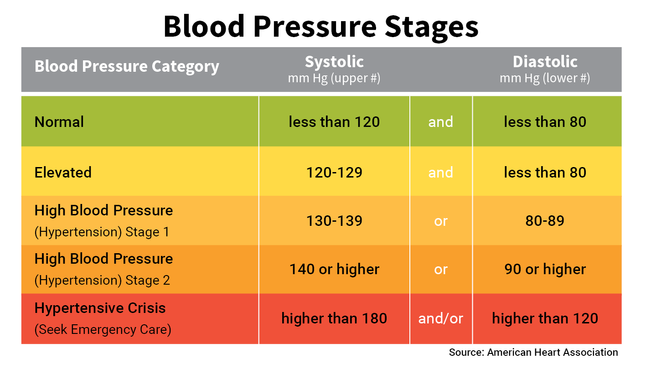

- Blood Pressure Diastolic
- Blood Pressure Limit // Blood Pressure Systolic

In which case parameter values are still unclear. A solution to this could be to remove these variables and remain only with the hypertension feature that indicates if the individual has hypertension or not.


Unique Values in blood pressure has
1    108
0     92
Name: blood_pressure, dtype: int64 




<AxesSubplot:xlabel='blood_pressure', ylabel='count'>

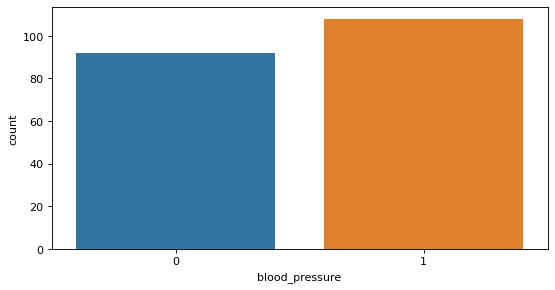

In [17]:
plt.figure(figsize=(8,4), dpi=80)

print('\nUnique Values in blood pressure has\n{} '.format(kidney_data['blood_pressure'].value_counts()))
print('\n')
sns.countplot(x = "blood_pressure", data=kidney_data)



Unique Values in blood pressure limit has
0    95
1    59
2    46
Name: blood_pressure_limit, dtype: int64 




<AxesSubplot:xlabel='blood_pressure_limit', ylabel='count'>

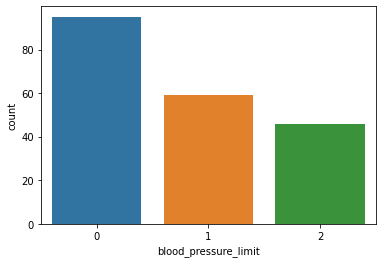

In [18]:
print('\nUnique Values in blood pressure limit has\n{} '.format(kidney_data['blood_pressure_limit'].value_counts()))
print('\n')
sns.countplot(x = "blood_pressure_limit", data=kidney_data)


Unique Values in hypertension has
0    122
1     78
Name: hypertension, dtype: int64 




<AxesSubplot:xlabel='hypertension', ylabel='count'>

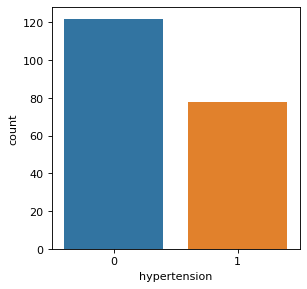

In [19]:
print('\nUnique Values in hypertension has\n{} '.format(kidney_data['hypertension'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "hypertension", data=kidney_data)


Unique Values in specific gravity has
1.019 - 1.021    75
1.009 - 1.011    45
≥ 1.023          41
1.015 - 1.017    36
< 1.007           3
Name: specific_gravity, dtype: int64 




<AxesSubplot:xlabel='specific_gravity', ylabel='count'>

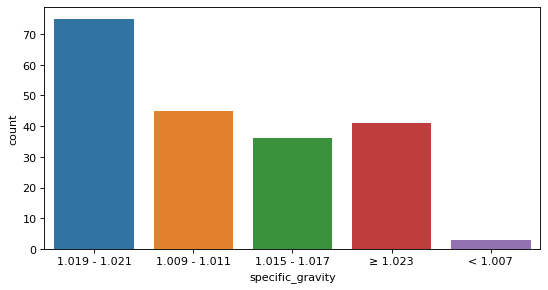

In [20]:
print('\nUnique Values in specific gravity has\n{} '.format(kidney_data['specific_gravity'].value_counts()))
print('\n')
plt.figure(figsize=(8,4), dpi=80)
sns.countplot(x = "specific_gravity", data=kidney_data)


Unique Values in albumin has
< 0      116
2 - 2     27
3 - 3     23
1 - 1     21
≥ 4       13
Name: albumin, dtype: int64 




<AxesSubplot:xlabel='albumin', ylabel='count'>

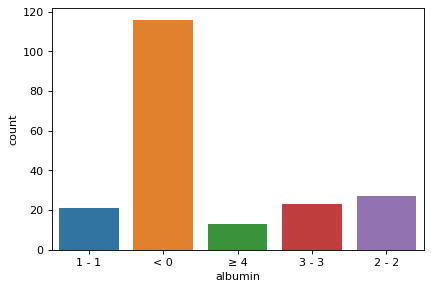

In [21]:
print('\nUnique Values in albumin has\n{} '.format(kidney_data['albumin'].value_counts()))
print('\n')

plt.figure(figsize=(6,4), dpi=80)
sns.countplot(x = "albumin", data=kidney_data)

**Red blood cells**

Representation of values can either be;
- 0 for Normal
- 1 for Abnormal


Unique Values in red blood cells has
0    175
1     25
Name: red_blood_cells, dtype: int64 




<AxesSubplot:xlabel='red_blood_cells', ylabel='count'>

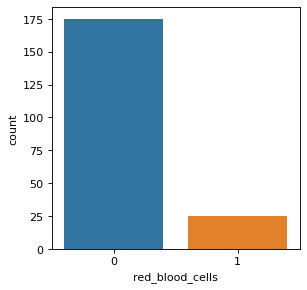

In [22]:
print('\nUnique Values in red blood cells has\n{} '.format(kidney_data['red_blood_cells'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "red_blood_cells", data=kidney_data)


Unique Values in sugar has
< 0      170
2 - 2      9
3 - 4      8
4 - 4      6
1 - 2      6
≥ 4        1
Name: sugar, dtype: int64 




<AxesSubplot:xlabel='sugar', ylabel='count'>

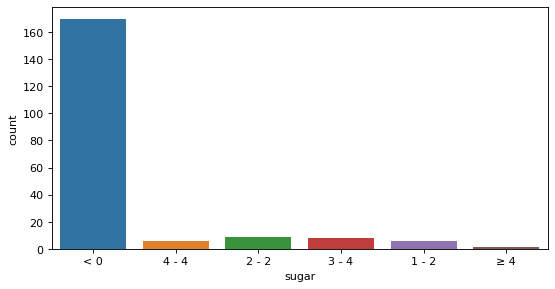

In [23]:
print('\nUnique Values in sugar has\n{} '.format(kidney_data['sugar'].value_counts()))
print('\n')

plt.figure(figsize=(8,4), dpi=80)
sns.countplot(x = "sugar", data=kidney_data)

**Pus cells**

Representation of values can either be;
- 0 for Normal
- 1 for Abnormal


Unique Values in pus cell has
0    155
1     45
Name: pus_cell, dtype: int64 




<AxesSubplot:xlabel='pus_cell', ylabel='count'>

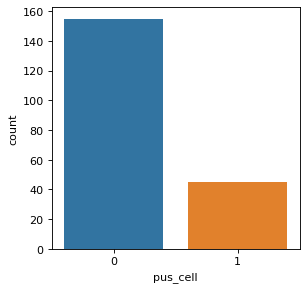

In [24]:
print('\nUnique Values in pus cell has\n{} '.format(kidney_data['pus_cell'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "pus_cell", data=kidney_data)

**Pus cells clumps**

Representation of values can either be;
- 0 for Not present
- 1 for Present


Unique Values in pus cell clumps has
0    173
1     27
Name: pus_cell_clumps, dtype: int64 




<AxesSubplot:xlabel='pus_cell_clumps', ylabel='count'>

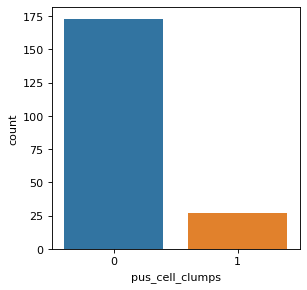

In [25]:
print('\nUnique Values in pus cell clumps has\n{} '.format(kidney_data['pus_cell_clumps'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "pus_cell_clumps", data=kidney_data)

**Bacteria**

Representation of values can either be;
- 0 for Not present
- 1 for Present


Unique Values in bacteria has
0    189
1     11
Name: bacteria, dtype: int64 




<AxesSubplot:xlabel='bacteria', ylabel='count'>

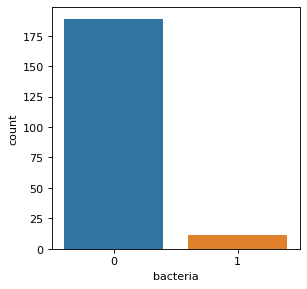

In [26]:
print('\nUnique Values in bacteria has\n{} '.format(kidney_data['bacteria'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "bacteria", data=kidney_data)


Unique Values in blood glucose random has
112 - 154    79
< 112        70
196 - 238    14
154 - 196    13
238 - 280    11
406 - 448     4
280 - 322     4
≥ 448         3
364 - 406     1
322 - 364     1
Name: blood_glucose_random, dtype: int64 




<AxesSubplot:xlabel='blood_glucose_random', ylabel='count'>

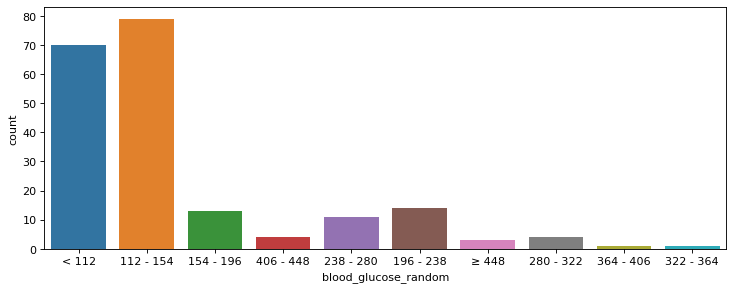

In [27]:
print('\nUnique Values in blood glucose random has\n{} '.format(kidney_data['blood_glucose_random'].value_counts()))
print('\n')

plt.figure(figsize=(11,4), dpi=80)
sns.countplot(x = "blood_glucose_random", data=kidney_data)


Unique Values in blood urea has
< 48.1           108
48.1 - 86.2       53
86.2 - 124.3      16
124.3 - 162.4     11
200.5 - 238.6      5
162.4 - 200.5      5
≥ 352.9            1
238.6 - 276.7      1
Name: blood_urea, dtype: int64 




<AxesSubplot:xlabel='blood_urea', ylabel='count'>

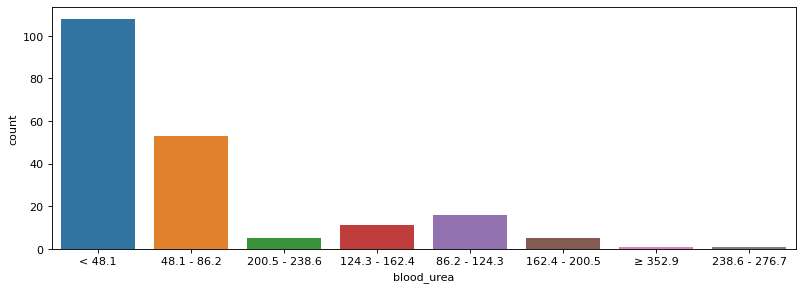

In [28]:
print('\nUnique Values in blood urea has\n{} '.format(kidney_data['blood_urea'].value_counts()))
print('\n')

plt.figure(figsize=(12,4), dpi=80)
sns.countplot(x = "blood_urea", data=kidney_data)

**Blood Sodium** 

Normal blood sodium levels are within the **range of 135 - 145 mEq/L**. Blood sodium values outside of the normal range can indicate kidney dysfunction, dehydration, or other medical issues. A disruption in the balance of sodium results in hypovolemia or hypervolemia whilst water balance disruption can be diagnosed as a condition called hyponatremia when the blood sodium levels deprecate below 135 mEq/L and hypernatremia when the blood sodium levels elevate above 145 mEq/L 


Unique Values in sodium has
133 - 138    92
138 - 143    49
143 - 148    22
128 - 133    14
148 - 153     9
123 - 128     6
< 118         4
118 - 123     3
≥ 158         1
Name: sodium, dtype: int64 




<AxesSubplot:xlabel='sodium', ylabel='count'>

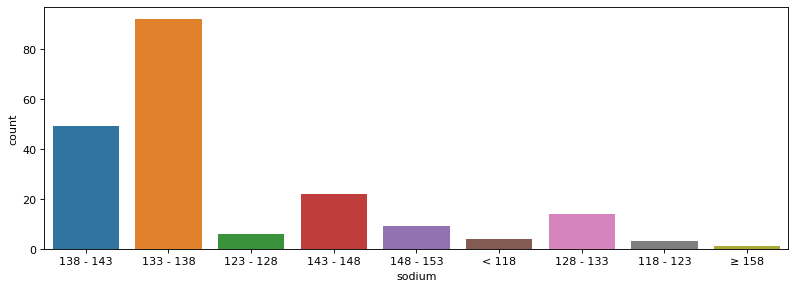

In [29]:
print('\nUnique Values in sodium has\n{} '.format(kidney_data['sodium'].value_counts()))
print('\n')

plt.figure(figsize=(12,4), dpi=80)
sns.countplot(x = "sodium", data=kidney_data)

**Serum creatinine**  
Normal value ranges:

- For adult men, 0.74 to 1.35 mg/dL (65.4 to 119.3 micromoles/L)

- For adult women, 0.59 to 1.04 mg/dL (52.2 to 91.9 micromoles/L)

Values in dataset are considered abnormals values or inconsistent with what is to be expected. Even the lowest limit of < 3.65


Unique Values in serum_creatinine has
< 3.65          159
3.65 - 6.8       22
6.8 - 9.95        9
13.1 - 16.25      4
9.95 - 13.1       4
16.25 - 19.4      1
≥ 28.85           1
Name: serum_creatinine, dtype: int64 




<AxesSubplot:xlabel='serum_creatinine', ylabel='count'>

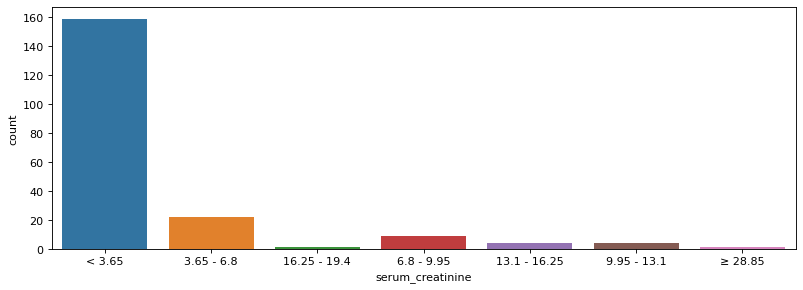

In [30]:
print('\nUnique Values in serum_creatinine has\n{} '.format(kidney_data['serum_creatinine'].value_counts()))
print('\n')

plt.figure(figsize=(12,4), dpi=80)
sns.countplot(x = "serum_creatinine", data=kidney_data)

**Potassium**

The normal range of potassium in the human body is between 3.5 - 5.2 mEq/L (3.5 - 5.2 mmol/L). 

The presence of excess unfiltered potassium results in a condition called hyperkalemia, whilst an excessive low potassium level results in a condition called hypokalemia.

Hyperkalemia is a common condition present in CKD patients 


Unique Values in potassium has
< 7.31           197
≥ 42.59            1
7.31 - 11.72       1
38.18 - 42.59      1
Name: potassium, dtype: int64 




<AxesSubplot:xlabel='potassium', ylabel='count'>

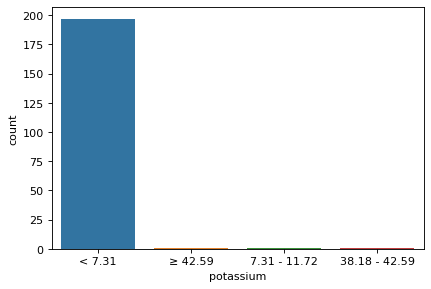

In [31]:
print('\nUnique Values in potassium has\n{} '.format(kidney_data['potassium'].value_counts()))
print('\n')

plt.figure(figsize=(6,4), dpi=80)
sns.countplot(x = "potassium", data=kidney_data)


Unique Values in hemoglobin has
11.3 - 12.6    49
10 - 11.3      28
13.9 - 15.2    26
8.7 - 10       23
15.2 - 16.5    20
12.6 - 13.9    19
≥ 16.5         15
7.4 - 8.7      12
< 6.1           4
6.1 - 7.4       4
Name: hemoglobin, dtype: int64 




<AxesSubplot:xlabel='hemoglobin', ylabel='count'>

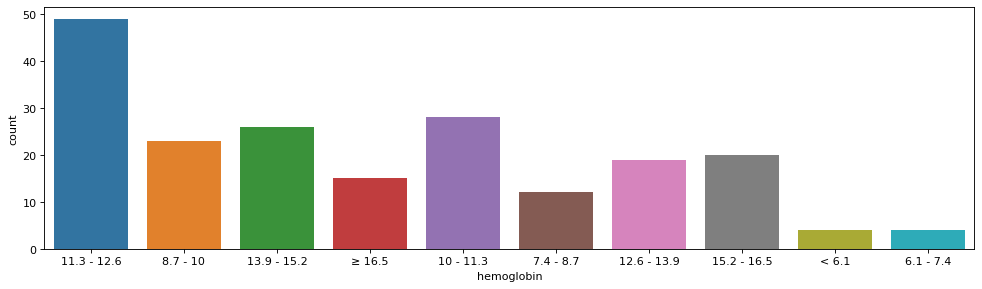

In [32]:
print('\nUnique Values in hemoglobin has\n{} '.format(kidney_data['hemoglobin'].value_counts()))
print('\n')

plt.figure(figsize=(15,4), dpi=80)
sns.countplot(x = "hemoglobin", data=kidney_data)


Unique Values in packed cell volume has
37.4 - 41.3    56
41.3 - 45.2    29
33.5 - 37.4    23
29.6 - 33.5    22
≥ 49.1         19
25.7 - 29.6    18
45.2 - 49.1    17
21.8 - 25.7    10
< 17.9          3
17.9 - 21.8     3
Name: packed_cell_volume, dtype: int64 




<AxesSubplot:xlabel='packed_cell_volume', ylabel='count'>

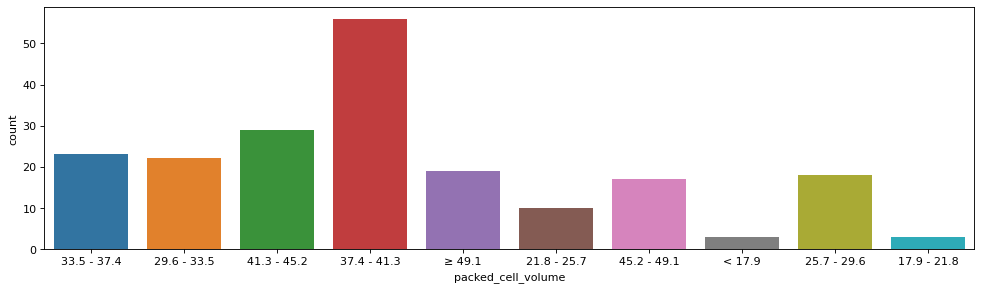

In [33]:
print('\nUnique Values in packed cell volume has\n{} '.format(kidney_data['packed_cell_volume'].value_counts()))
print('\n')

plt.figure(figsize=(15,4), dpi=80)
sns.countplot(x = "packed_cell_volume", data=kidney_data)


Unique Values in red blood cell count has
4.46 - 5.05    96
5.05 - 5.64    23
3.28 - 3.87    21
3.87 - 4.46    21
5.64 - 6.23    18
6.23 - 6.82     9
2.69 - 3.28     7
< 2.69          4
≥ 7.41          1
Name: red_blood_cell_count, dtype: int64 




<AxesSubplot:xlabel='red_blood_cell_count', ylabel='count'>

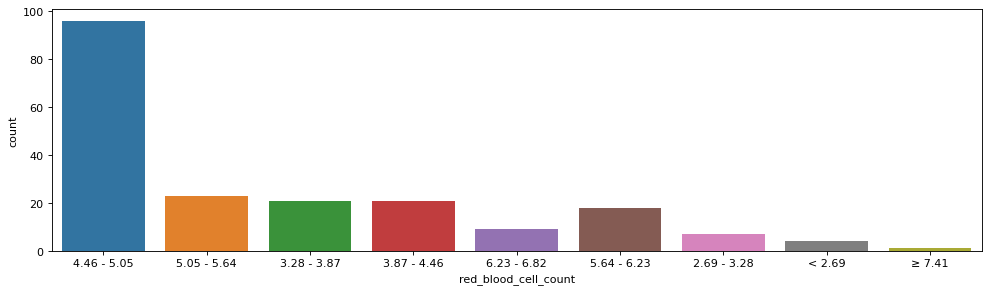

In [34]:
print('\nUnique Values in red blood cell count has\n{} '.format(kidney_data['red_blood_cell_count'].value_counts()))
print('\n')

plt.figure(figsize=(15,4), dpi=80)
sns.countplot(x = "red_blood_cell_count", data=kidney_data)


Unique Values in white blood cell count has
7360 - 9740      98
4980 - 7360      47
9740 - 12120     29
< 4980           10
12120 - 14500     6
14500 - 16880     6
16880 - 19260     2
≥ 24020           1
19260 - 21640     1
Name: white_blood_cell_count, dtype: int64 




<AxesSubplot:xlabel='white_blood_cell_count', ylabel='count'>

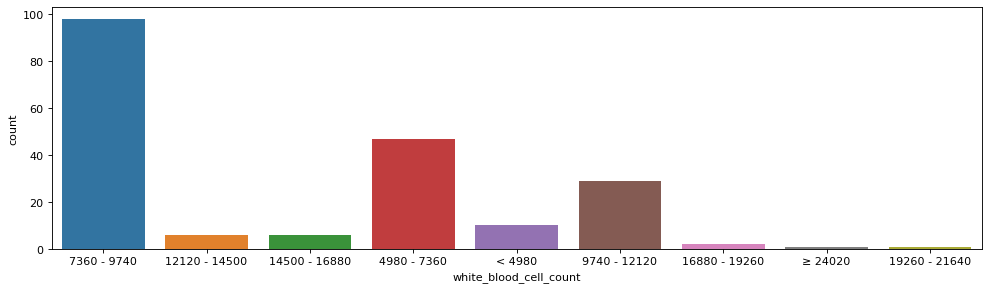

In [35]:
print('\nUnique Values in white blood cell count has\n{} '.format(kidney_data['white_blood_cell_count'].value_counts()))
print('\n')

plt.figure(figsize=(15,4), dpi=80)
sns.countplot(x = "white_blood_cell_count", data=kidney_data)


Unique Values in diabetes mellitus has
0    130
1     70
Name: diabetes_mellitus, dtype: int64 




<AxesSubplot:xlabel='diabetes_mellitus', ylabel='count'>

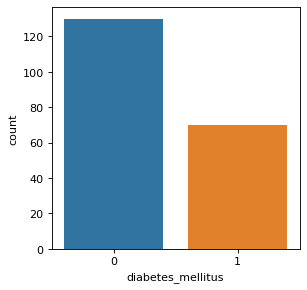

In [36]:
print('\nUnique Values in diabetes mellitus has\n{} '.format(kidney_data['diabetes_mellitus'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "diabetes_mellitus", data=kidney_data)


Unique Values in coronary artery disease limit has
0    178
1     22
Name: coronary_artery_disease, dtype: int64 




<AxesSubplot:xlabel='coronary_artery_disease', ylabel='count'>

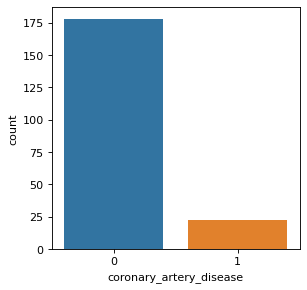

In [37]:
print('\nUnique Values in coronary artery disease limit has\n{} '.format(kidney_data['coronary_artery_disease'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "coronary_artery_disease", data=kidney_data)


Unique Values in appetite limit has
0    160
1     40
Name: appetite, dtype: int64 




<AxesSubplot:xlabel='appetite', ylabel='count'>

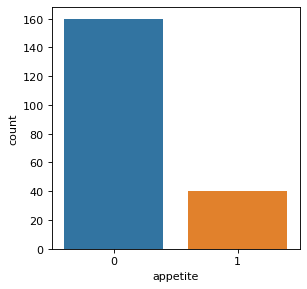

In [38]:
print('\nUnique Values in appetite limit has\n{} '.format(kidney_data['appetite'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "appetite", data=kidney_data)


Unique Values in pedal edema limit has
0    165
1     35
Name: pedal_edema, dtype: int64 




<AxesSubplot:xlabel='pedal_edema', ylabel='count'>

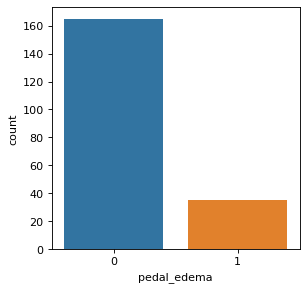

In [39]:
print('\nUnique Values in pedal edema limit has\n{} '.format(kidney_data['pedal_edema'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "pedal_edema", data=kidney_data)


Unique Values in anemia limit has
0    168
1     32
Name: anemia, dtype: int64 




<AxesSubplot:xlabel='anemia', ylabel='count'>

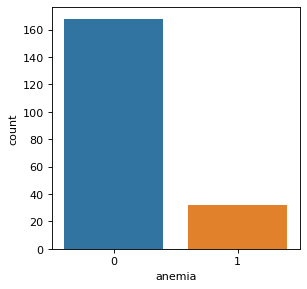

In [40]:
print('\nUnique Values in anemia limit has\n{} '.format(kidney_data['anemia'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "anemia", data=kidney_data)

#### Glomerular Filtration Rate


Unique Values in GFR limit has
< 26.6175            68
26.6175 - 51.7832    38
51.7832 - 76.949     28
76.949 - 102.115     17
102.115 - 127.281    15
127.281 - 152.446    11
152.446 - 177.612     9
177.612 - 202.778     8
202.778 - 227.944     3
≥ 227.944             2
 p                    1
Name: glomerular_filtration_rate, dtype: int64 




<AxesSubplot:xlabel='glomerular_filtration_rate', ylabel='count'>

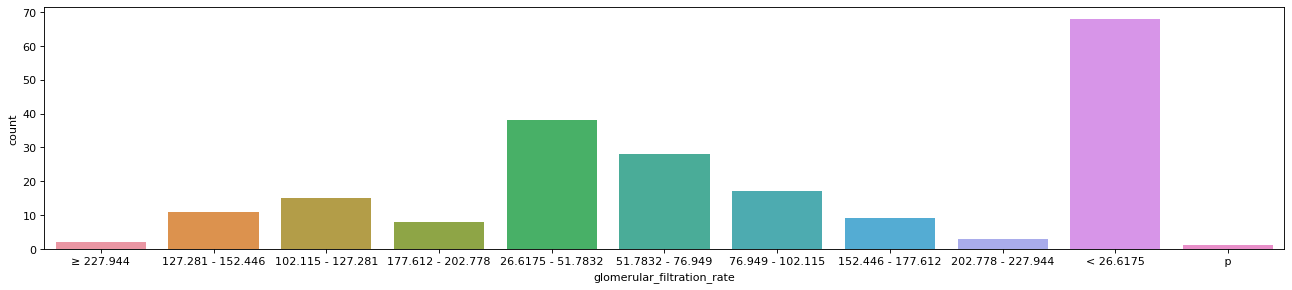

In [41]:
print('\nUnique Values in GFR limit has\n{} '.format(kidney_data['glomerular_filtration_rate'].value_counts()))
print('\n')

plt.figure(figsize=(20,4), dpi=80)
sns.countplot(x = "glomerular_filtration_rate", data=kidney_data)

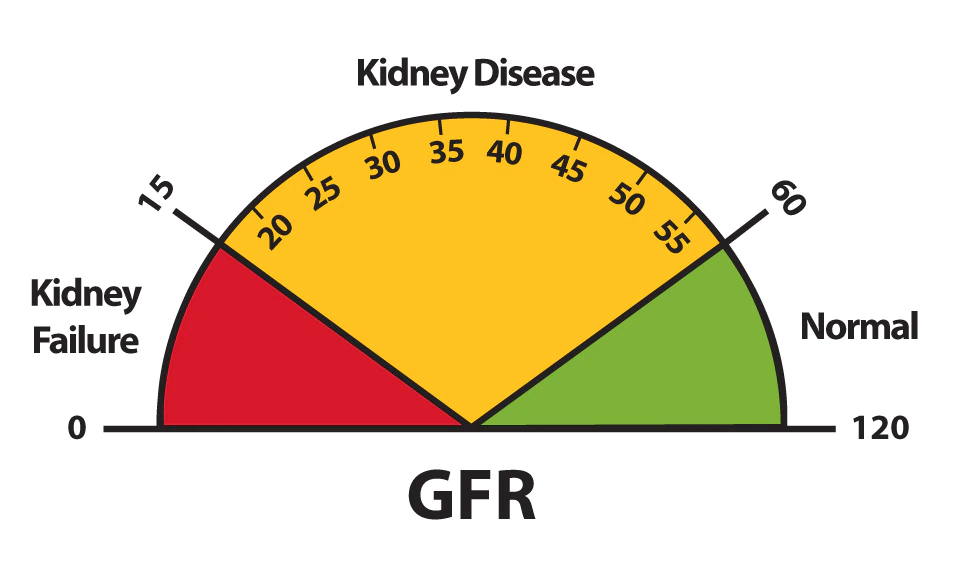

Thus, according to the recorded values, the following are considered in the orange zone to the green zone:
- 51.7832 - 76.949
- 26.6175 - 51.7832

The following are considered to be in the red zone to the orange zone:
- < 26.6175


Unique Values in stage limit has
s1    54
s4    45
s2    35
s5    35
s3    31
Name: stage, dtype: int64 




<AxesSubplot:xlabel='stage', ylabel='count'>

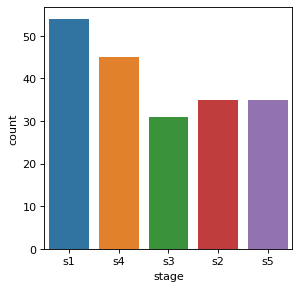

In [42]:
print('\nUnique Values in stage limit has\n{} '.format(kidney_data['stage'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "stage", data=kidney_data)


Unique Values in affected limit has
1    128
0     72
Name: affected, dtype: int64 




<AxesSubplot:xlabel='affected', ylabel='count'>

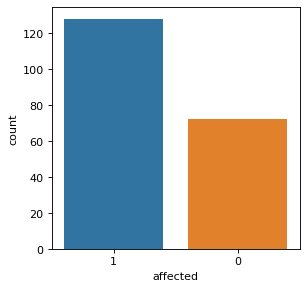

In [43]:
print('\nUnique Values in affected limit has\n{} '.format(kidney_data['affected'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "affected", data=kidney_data)


Unique Values in age limit has
59 - 66    48
66 - 74    34
51 - 59    33
43 - 51    31
27 - 35    14
35 - 43    12
20 - 27    10
≥ 74       10
< 12        4
12 - 20     4
Name: age, dtype: int64 




<AxesSubplot:xlabel='age', ylabel='count'>

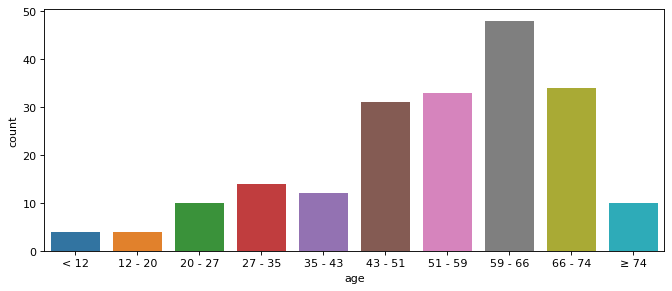

In [44]:
print('\nUnique Values in age limit has\n{} '.format(kidney_data['age'].value_counts()))
print('\n')

plt.figure(figsize=(10,4), dpi=80)
sns.countplot(x = "age", data=kidney_data)


Unique Values in class limit has
ckd       128
notckd     72
Name: class, dtype: int64 




<AxesSubplot:xlabel='class', ylabel='count'>

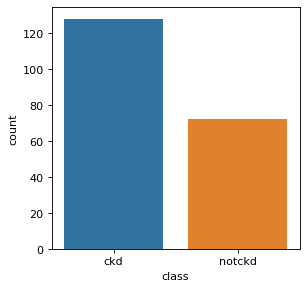

In [45]:
print('\nUnique Values in class limit has\n{} '.format(kidney_data['class'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "class", data=kidney_data)

Feature engineering

In [57]:
kidney_df1 = kidney_data.copy()

In [58]:
kidney_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   blood_pressure              200 non-null    object
 1   blood_pressure_limit        200 non-null    object
 2   specific_gravity            200 non-null    object
 3   albumin                     200 non-null    object
 4   class                       200 non-null    object
 5   red_blood_cells             200 non-null    object
 6   sugar                       200 non-null    object
 7   pus_cell                    200 non-null    object
 8   pus_cell_clumps             200 non-null    object
 9   bacteria                    200 non-null    object
 10  blood_glucose_random        200 non-null    object
 11  blood_urea                  200 non-null    object
 12  sodium                      200 non-null    object
 13  serum_creatinine            200 non-null    object

In [59]:
kidney_df1.drop(['blood_pressure', 'blood_pressure_limit'],axis=1,inplace=True)

In [60]:
kidney_df1['glomerular_filtration_rate']=kidney_df1['glomerular_filtration_rate'].map({'< 26.6175':'< 26.6175','26.6175 - 51.7832':'26.6175 - 51.7832',
                                                                                       '51.7832 - 76.949':'51.7832 - 76.949','76.949 - 102.115':'76.949 - 102.115',
                                                                                       '102.115 - 127.281':'102.115 - 127.281',
                                                                                       '127.281 - 152.446':'127.281 - 152.446','152.446 - 177.612':'152.446 - 177.612',
                                                                                       '177.612 - 202.778':'177.612 - 202.778','202.778 - 227.944':'202.778 - 227.944',
                                                                                       '≥ 227.944':'≥ 227.944'})

print('After changing the variables according to order', kidney_df1['glomerular_filtration_rate'].unique())

After changing the variables according to order ['≥ 227.944' '127.281 - 152.446' '102.115 - 127.281' '177.612 - 202.778'
 '26.6175 - 51.7832' '51.7832 - 76.949' '76.949 - 102.115'
 '152.446 - 177.612' '202.778 - 227.944' '< 26.6175' nan]


In [61]:
# Using mode to impute the missing values for categorical features
def imputate_cat(kidney):
    for column in kidney:
        
        kidney[column] = kidney[column].fillna(kidney[column].mode()[0])
    
    return kidney

kidney_df1 = imputate_cat(kidney_df1)
print("Count of NULL values after imputation\n")
kidney_df1.isnull().sum()

Count of NULL values after imputation



specific_gravity              0
albumin                       0
class                         0
red_blood_cells               0
sugar                         0
pus_cell                      0
pus_cell_clumps               0
bacteria                      0
blood_glucose_random          0
blood_urea                    0
sodium                        0
serum_creatinine              0
potassium                     0
hemoglobin                    0
packed_cell_volume            0
red_blood_cell_count          0
white_blood_cell_count        0
hypertension                  0
diabetes_mellitus             0
coronary_artery_disease       0
appetite                      0
pedal_edema                   0
anemia                        0
glomerular_filtration_rate    0
stage                         0
affected                      0
age                           0
dtype: int64

In [51]:
#####################################################################

In [62]:
kidney_df1.shape

(200, 27)

In [63]:
print('Unique values in age', kidney_df1['age'].unique())
print('\nUnique values in potassium', kidney_df1['potassium'].unique())
print('\nUnique values in stage', kidney_df1['stage'].unique())
print('\nUnique values in specific_gravity', kidney_df1['specific_gravity'].unique())
print('\nUnique values in albumin', kidney_df1['albumin'].unique())
print('\nUnique values in sugar', kidney_df1['sugar'].unique())
print('\nUnique values in blood_glucose_random', kidney_df1['blood_glucose_random'].unique())
print('\nUnique values in blood_urea', kidney_df1['blood_urea'].unique())
print('\nUnique values in sodium', kidney_df1['sodium'].unique())
print('\nUnique values in serum_creatinine', kidney_df1['serum_creatinine'].unique())
print('\nUnique values in hemoglobin', kidney_df1['hemoglobin'].unique())
print('\nUnique values in packed_cell_volume', kidney_df1['packed_cell_volume'].unique())
print('\nUnique values in red_blood_cell_count', kidney_df1['red_blood_cell_count'].unique())
print('\nUnique values in white_blood_cell_count', kidney_df1['white_blood_cell_count'].unique())
print('\nUnique values in glomerular_filtration_rate', kidney_df1['glomerular_filtration_rate'].unique())

print('\nUnique values in affected', kidney_df1['affected'].unique())
print('\nUnique values in red_blood_cells', kidney_df1['red_blood_cells'].unique())
print('\nUnique values in pus_cell', kidney_df1['pus_cell'].unique())
print('\nUnique values in pus_cell_clumps', kidney_df1['pus_cell_clumps'].unique())
print('\nUnique values in bacteria', kidney_df1['bacteria'].unique())
print('\nUnique values in hypertension', kidney_df1['hypertension'].unique())
print('\nUnique values in diabetes_mellitus', kidney_df1['diabetes_mellitus'].unique())
print('\nUnique values in coronary_artery_disease', kidney_df1['coronary_artery_disease'].unique())
print('\nUnique values in appetite', kidney_df1['appetite'].unique())
print('\nUnique values in pedal_edema', kidney_df1['pedal_edema'].unique())
print('\nUnique values in anemia', kidney_df1['anemia'].unique())

Unique values in age ['< 12' '12 - 20' '20 - 27' '27 - 35' '35 - 43' '43 - 51' '51 - 59'
 '59 - 66' '66 - 74' '≥ 74']

Unique values in potassium ['< 7.31' '≥ 42.59' '7.31 - 11.72' '38.18 - 42.59']

Unique values in stage ['s1' 's4' 's3' 's2' 's5']

Unique values in specific_gravity ['1.019 - 1.021' '1.009 - 1.011' '1.015 - 1.017' '≥ 1.023' '< 1.007']

Unique values in albumin ['1 - 1' '< 0' '≥ 4' '3 - 3' '2 - 2']

Unique values in sugar ['< 0' '4 - 4' '2 - 2' '3 - 4' '1 - 2' '≥ 4']

Unique values in blood_glucose_random ['< 112' '112 - 154' '154 - 196' '406 - 448' '238 - 280' '196 - 238'
 '≥ 448' '280 - 322' '364 - 406' '322 - 364']

Unique values in blood_urea ['< 48.1' '48.1 - 86.2' '200.5 - 238.6' '124.3 - 162.4' '86.2 - 124.3'
 '162.4 - 200.5' '≥ 352.9' '238.6 - 276.7']

Unique values in sodium ['138 - 143' '133 - 138' '123 - 128' '143 - 148' '148 - 153' '< 118'
 '128 - 133' '118 - 123' '≥ 158']

Unique values in serum_creatinine ['< 3.65' '3.65 - 6.8' '16.25 - 19.4' '6.8 - 9.95' 

In [75]:
kidney_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   specific_gravity            200 non-null    object  
 1   albumin                     200 non-null    object  
 2   class                       200 non-null    category
 3   red_blood_cells             200 non-null    category
 4   sugar                       200 non-null    object  
 5   pus_cell                    200 non-null    category
 6   pus_cell_clumps             200 non-null    category
 7   bacteria                    200 non-null    category
 8   blood_glucose_random        200 non-null    object  
 9   blood_urea                  200 non-null    object  
 10  sodium                      200 non-null    object  
 11  serum_creatinine            200 non-null    object  
 12  potassium                   200 non-null    object  
 13  hemoglobin          

In [74]:
kidney_df1['affected'] = kidney_df1['affected'].astype("category")
kidney_df1['red_blood_cells'] = kidney_df1['red_blood_cells'].astype("category")
kidney_df1['pus_cell'] = kidney_df1['pus_cell'].astype("category")
kidney_df1['pus_cell_clumps'] = kidney_df1['pus_cell_clumps'].astype("category")
kidney_df1['bacteria'] = kidney_df1['bacteria'].astype("category")
kidney_df1['hypertension'] = kidney_df1['hypertension'].astype("category")
kidney_df1['diabetes_mellitus'] = kidney_df1['diabetes_mellitus'].astype("category")
kidney_df1['coronary_artery_disease'] = kidney_df1['coronary_artery_disease'].astype("category")
kidney_df1['appetite'] = kidney_df1['appetite'].astype("category")
kidney_df1['pedal_edema'] = kidney_df1['pedal_edema'].astype("category")
kidney_df1['anemia'] = kidney_df1['anemia'].astype("category")
kidney_df1['class'] = kidney_df1['class'].astype("category")

In [77]:
def extract_col(kidney):
    categorical_col = [col for col in kidney.columns if kidney[col].dtype == 'category']
    object_col = [col for col in kidney.columns if kidney[col].dtype == 'object']
    return categorical_col,object_col

categorical_col,object_col=extract_col(kidney_df1)

In [78]:
kidney_a = kidney_df1[categorical_col]
kidney_b = kidney_df1[object_col]

In [79]:
kidney_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   class                    200 non-null    category
 1   red_blood_cells          200 non-null    category
 2   pus_cell                 200 non-null    category
 3   pus_cell_clumps          200 non-null    category
 4   bacteria                 200 non-null    category
 5   hypertension             200 non-null    category
 6   diabetes_mellitus        200 non-null    category
 7   coronary_artery_disease  200 non-null    category
 8   appetite                 200 non-null    category
 9   pedal_edema              200 non-null    category
 10  anemia                   200 non-null    category
 11  affected                 200 non-null    category
dtypes: category(12)
memory usage: 3.9 KB


In [80]:
kidney_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   specific_gravity            200 non-null    object
 1   albumin                     200 non-null    object
 2   sugar                       200 non-null    object
 3   blood_glucose_random        200 non-null    object
 4   blood_urea                  200 non-null    object
 5   sodium                      200 non-null    object
 6   serum_creatinine            200 non-null    object
 7   potassium                   200 non-null    object
 8   hemoglobin                  200 non-null    object
 9   packed_cell_volume          200 non-null    object
 10  red_blood_cell_count        200 non-null    object
 11  white_blood_cell_count      200 non-null    object
 12  glomerular_filtration_rate  200 non-null    object
 13  stage                       200 non-null    object

In [81]:
# get dummies of only features with more than two levels.
kidney_b = pd.get_dummies(kidney_b)

In [82]:
kidney_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Columns: 117 entries, specific_gravity_1.009 - 1.011 to age_≥ 74
dtypes: uint8(117)
memory usage: 23.0 KB


In [83]:
print(kidney_b.columns.tolist())

['specific_gravity_1.009 - 1.011', 'specific_gravity_1.015 - 1.017', 'specific_gravity_1.019 - 1.021', 'specific_gravity_< 1.007', 'specific_gravity_≥ 1.023', 'albumin_1 - 1', 'albumin_2 - 2', 'albumin_3 - 3', 'albumin_< 0', 'albumin_≥ 4', 'sugar_1 - 2', 'sugar_2 - 2', 'sugar_3 - 4', 'sugar_4 - 4', 'sugar_< 0', 'sugar_≥ 4', 'blood_glucose_random_112 - 154', 'blood_glucose_random_154 - 196', 'blood_glucose_random_196 - 238', 'blood_glucose_random_238 - 280', 'blood_glucose_random_280 - 322', 'blood_glucose_random_322 - 364', 'blood_glucose_random_364 - 406', 'blood_glucose_random_406 - 448', 'blood_glucose_random_< 112', 'blood_glucose_random_≥ 448', 'blood_urea_124.3 - 162.4', 'blood_urea_162.4 - 200.5', 'blood_urea_200.5 - 238.6', 'blood_urea_238.6 - 276.7', 'blood_urea_48.1 - 86.2', 'blood_urea_86.2 - 124.3', 'blood_urea_< 48.1', 'blood_urea_≥ 352.9', 'sodium_118 - 123', 'sodium_123 - 128', 'sodium_128 - 133', 'sodium_133 - 138', 'sodium_138 - 143', 'sodium_143 - 148', 'sodium_148 - 

In [84]:
kidney_b.shape

(200, 117)

In [63]:
############################################################################

In [50]:
kidney_df1.columns

Index(['specific_gravity_1.009 - 1.011', 'specific_gravity_1.015 - 1.017',
       'specific_gravity_1.019 - 1.021', 'specific_gravity_< 1.007',
       'specific_gravity_≥ 1.023', 'albumin_1 - 1', 'albumin_2 - 2',
       'albumin_3 - 3', 'albumin_< 0', 'albumin_≥ 4',
       ...
       'age_12 - 20', 'age_20 - 27', 'age_27 - 35', 'age_35 - 43',
       'age_43 - 51', 'age_51 - 59', 'age_59 - 66', 'age_66 - 74', 'age_< 12',
       'age_≥ 74'],
      dtype='object', length=141)

In [88]:
kidney_df2 = kidney_b.copy()

In [90]:
kidney_df2['affected'] = kidney_a['affected']
kidney_df2['red_blood_cells'] = kidney_a['red_blood_cells']
kidney_df2['pus_cell'] = kidney_a['pus_cell']
kidney_df2['pus_cell_clumps'] = kidney_a['pus_cell_clumps']
kidney_df2['bacteria'] = kidney_a['bacteria']
kidney_df2['hypertension'] = kidney_a['hypertension']
kidney_df2['diabetes_mellitus'] = kidney_a['diabetes_mellitus']
kidney_df2['coronary_artery_disease'] = kidney_a['coronary_artery_disease']
kidney_df2['appetite'] = kidney_a['appetite']
kidney_df2['pedal_edema'] = kidney_a['pedal_edema']
kidney_df2['anemia'] = kidney_a['anemia']
kidney_df2['class'] = kidney_a['class']

In [93]:
kidney_df2.shape

(200, 129)

In [92]:
kidney_df2.head()

,specific_gravity_1.009 - 1.011,specific_gravity_1.015 - 1.017,specific_gravity_1.019 - 1.021,specific_gravity_< 1.007,specific_gravity_≥ 1.023,albumin_1 - 1,albumin_2 - 2,albumin_3 - 3,albumin_< 0,albumin_≥ 4,...,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ckd
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ckd
4,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,ckd
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ckd
6,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,ckd


In [54]:
kidney_df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
specific_gravity_1.009 - 1.011,200.0,0.225,0.418630,0.0,0.0,0.0,0.0,1.0
specific_gravity_1.015 - 1.017,200.0,0.180,0.385152,0.0,0.0,0.0,0.0,1.0
specific_gravity_1.019 - 1.021,200.0,0.375,0.485338,0.0,0.0,0.0,1.0,1.0
specific_gravity_< 1.007,200.0,0.015,0.121857,0.0,0.0,0.0,0.0,1.0
specific_gravity_≥ 1.023,200.0,0.205,0.404715,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
age_51 - 59,200.0,0.165,0.372112,0.0,0.0,0.0,0.0,1.0
age_59 - 66,200.0,0.240,0.428155,0.0,0.0,0.0,0.0,1.0
age_66 - 74,200.0,0.170,0.376575,0.0,0.0,0.0,0.0,1.0
age_< 12,200.0,0.020,0.140351,0.0,0.0,0.0,0.0,1.0


Target feature is imbalanced, however, the dataset doesnt not exactly suffer from the imbalanced problem. The positive class is the majority class.

Class distribution in target feature has
0    178
1     22
Name: coronary_artery_disease, dtype: int64 


<AxesSubplot:xlabel='coronary_artery_disease', ylabel='count'>

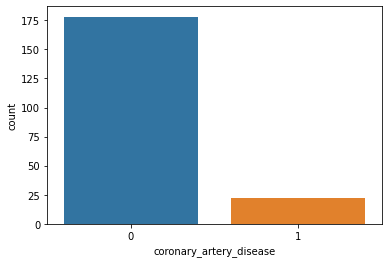

In [106]:
print('Class distribution in target feature has\n{} '.format(kidney_df2['coronary_artery_disease'].value_counts()))
sns.countplot(x = "coronary_artery_disease", data=kidney_df2)

Class distribution in target feature has
ckd       128
notckd     72
Name: class, dtype: int64 


<AxesSubplot:xlabel='class', ylabel='count'>

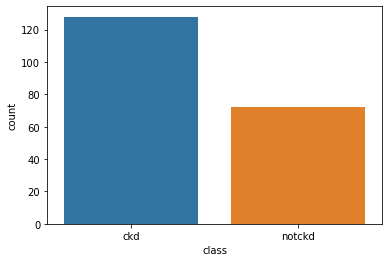

In [107]:
print('Class distribution in target feature has\n{} '.format(kidney_df2['class'].value_counts()))
sns.countplot(x = "class", data=kidney_df2)

# Feature Selection


#### Pearsons correlation coefficient feature selection

Not ideal becase there is too many columns. Exactly 129 columns.

#### Wrapper methods: Backward and Forward feature selection

#### Additionally
Dropping blood pressure and blood pressure limit because of the similarities with hypertension


## Feature selection using wrapper methods: Sequential Feature Selection

This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator. 

In [232]:
kidney_df3 = kidney_df2.copy()

# MACHINE LEARNING IMPLEMENTATION

Splitting the data into train and test

- Data 0: No feature selection implemented
- Data 1: Backward Elimination
- Data 2: Foward Elimination

In [233]:
kidney_df3['class'] = kidney_df3['class'].map({'notckd':0,'ckd':1})

# Data 0
# data split where all missing values are removed
kidney_X0 = kidney_df3.drop(['class'], axis=1)
kidney_y0 = kidney_df3['class']

# Data 1
# data split where all missing values are removed
kidney_X1 = kidney_df3.drop(['class'], axis=1)
kidney_y1 = kidney_df3['class']

# Data 2
# data split where all missing values are removed
kidney_X2 = kidney_df3.drop(['class'], axis=1)
kidney_y2 = kidney_df3['class']

In [234]:
train_X0, test_X0, train_Y0, test_Y0 = train_test_split(kidney_X0, kidney_y0, test_size=0.3, random_state=1234)
#test_X1, validation_X1, test_Y1, validation_Y1 = train_test_split(val_X1, val_Y1, test_size=0.5, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X0.shape)
print("Magnitude of the target training features:", train_Y0.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X1.shape)
#print("Magnitude of the target validation features:", validation_Y1.shape)
print("\nMagnitude of the descriptive test features:", test_X0.shape)
print("Magnitude of the target test features:", test_Y0.shape)


Magnitude of the descriptive training features: (140, 128)
Magnitude of the target training features: (140,)

Magnitude of the descriptive test features: (60, 128)
Magnitude of the target test features: (60,)


## Machine Learning Algorithm: Decision Tree

In [143]:
baseline_classification_tree = DecisionTreeClassifier(random_state=42)

In [144]:
# Implementation on simple unsampled data

# Fitting the decision tree
baseline_classification_tree.fit(train_X0, train_Y0)

# Performance of the tree on the train data
train_tree_prediction0 = baseline_classification_tree.predict(train_X0)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y0, train_tree_prediction0))

print('\nClassification Report:')
print(classification_report(train_Y0, train_tree_prediction0))

print('Accuracy Score on train data:')
baseline_classification_tree.score(train_X0, train_Y0)

# Performance of the tree on the test data
test_tree_prediction0 = baseline_classification_tree.predict(test_X0)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y0, test_tree_prediction0))

print('\nClassification Report:')
print(classification_report(test_Y0, test_tree_prediction0))

print('Accuracy Score on test data:')
baseline_classification_tree.score(test_X0, test_Y0)

recall_sensitivity = metrics.recall_score(test_Y0, test_tree_prediction0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, test_tree_prediction0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score on test data:
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


#### Data 1

In [196]:
feature_names = kidney_X1.columns

In [197]:
backward_sfs = SequentialFeatureSelector(baseline_classification_tree, n_features_to_select=0.2, 
                          direction='backward', scoring= 'accuracy', cv=5, n_jobs=-1).fit(kidney_X1, kidney_y1)

In [199]:
kidney_X1 = backward_sfs.transform(kidney_X1)

In [200]:
kidney_X1.shape

(200, 25)

In [201]:
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[backward_sfs.get_support()]}"
)

Features selected by forward sequential selection: Index(['stage_s2', 'stage_s3', 'stage_s4', 'stage_s5', 'age_12 - 20',
       'age_20 - 27', 'age_27 - 35', 'age_35 - 43', 'age_43 - 51',
       'age_51 - 59', 'age_59 - 66', 'age_66 - 74', 'age_< 12', 'age_≥ 74',
       'affected', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps',
       'bacteria', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia'],
      dtype='object')


In [202]:
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(kidney_X1, kidney_y1, test_size=0.3, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X1.shape)
print("Magnitude of the target training features:", train_Y1.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X1.shape)
#print("Magnitude of the target validation features:", validation_Y1.shape)
print("\nMagnitude of the descriptive test features:", test_X1.shape)
print("Magnitude of the target test features:", test_Y1.shape)


Magnitude of the descriptive training features: (140, 25)
Magnitude of the target training features: (140,)

Magnitude of the descriptive test features: (60, 25)
Magnitude of the target test features: (60,)


In [203]:
# Implementation on oversampled data

# Fitting the decision tree
baseline_classification_tree.fit(train_X1, train_Y1)

# Performance of the tree on the train data
train_tree_prediction1 = baseline_classification_tree.predict(train_X1)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y1, train_tree_prediction1))

print('\nClassification Report:')
print(classification_report(train_Y1, train_tree_prediction1))

print('Accuracy Score on train data:')
baseline_classification_tree.score(train_X1, train_Y1)

# Performance of the tree on the test data
test_tree_prediction1 = baseline_classification_tree.predict(test_X1)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1, test_tree_prediction1))

print('\nClassification Report:')
print(classification_report(test_Y1, test_tree_prediction1))

print('Accuracy Score on test data:')
baseline_classification_tree.score(test_X1, test_Y1)

recall_sensitivity = metrics.recall_score(test_Y1, test_tree_prediction1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, test_tree_prediction1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score on test data:
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


#### Data 2

In [222]:
feature_names = kidney_X2.columns

In [223]:
forward_sfs = SequentialFeatureSelector(baseline_classification_tree, n_features_to_select=0.8, 
                          direction='forward', scoring= 'accuracy', cv=5, n_jobs=-1).fit(kidney_X2, kidney_y2)

In [224]:
kidney_X2 = forward_sfs.transform(kidney_X2)
kidney_X2.shape

(200, 102)

In [216]:
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[forward_sfs.get_support()]}"
)

Features selected by forward sequential selection: Index(['specific_gravity_1.009 - 1.011', 'specific_gravity_1.015 - 1.017',
       'specific_gravity_1.019 - 1.021', 'specific_gravity_< 1.007',
       'specific_gravity_≥ 1.023', 'albumin_1 - 1', 'albumin_2 - 2',
       'albumin_3 - 3', 'albumin_< 0', 'albumin_≥ 4',
       ...
       'glomerular_filtration_rate_102.115 - 127.281',
       'glomerular_filtration_rate_127.281 - 152.446',
       'glomerular_filtration_rate_152.446 - 177.612',
       'glomerular_filtration_rate_177.612 - 202.778',
       'glomerular_filtration_rate_202.778 - 227.944',
       'glomerular_filtration_rate_26.6175 - 51.7832',
       'glomerular_filtration_rate_51.7832 - 76.949',
       'glomerular_filtration_rate_76.949 - 102.115',
       'glomerular_filtration_rate_< 26.6175', 'affected'],
      dtype='object', length=102)


In [225]:
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(kidney_X2, kidney_y2, test_size=0.3, random_state=1234)
#test_X2, validation_X2, test_Y2, validation_Y2 = train_test_split(val_X2, val_Y2, test_size=0.5, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X2.shape)
print("Magnitude of the target training features:", train_Y2.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X2.shape)
#print("Magnitude of the target validation features:", validation_Y2.shape)
print("\nMagnitude of the descriptive test features:", test_X2.shape)
print("Magnitude of the target test features:", test_Y2.shape)


Magnitude of the descriptive training features: (140, 102)
Magnitude of the target training features: (140,)

Magnitude of the descriptive test features: (60, 102)
Magnitude of the target test features: (60,)


In [226]:
# Fitting the decision tree
baseline_classification_tree.fit(train_X2, train_Y2)

# Performance of the tree on the train data
train_tree_prediction2 = baseline_classification_tree.predict(train_X2)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2, train_tree_prediction2))

print('\nClassification Report:')
print(classification_report(train_Y2, train_tree_prediction2))

print('Accuracy Score on train data: {}'.format(baseline_classification_tree.score(train_X2, train_Y2)))


# Performance of the tree on the test data
test_tree_prediction2 = baseline_classification_tree.predict(test_X2)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2, test_tree_prediction2))

print('\nClassification Report:')
print(classification_report(test_Y2, test_tree_prediction2))

print('Accuracy Score on test data: {}'. format(baseline_classification_tree.score(test_X2, test_Y2)))

recall_sensitivity = metrics.recall_score(test_Y2, test_tree_prediction2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, test_tree_prediction2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score on test data: 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0

## Machine Learning Algorithm: Random Forest

In [235]:
baseline_random_forest = RandomForestClassifier(n_estimators = 100, bootstrap=True, 
                                       oob_score=True,random_state=1) 

In [228]:
# Implementation on simple unsampled data

# Fitting the decision tree
baseline_random_forest.fit(train_X0, train_Y0)

# Performance of the tree on the train data
train_rf_prediction0 = baseline_random_forest.predict(train_X0)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y0, train_rf_prediction0))

print('\nClassification Report:')
print(classification_report(train_Y0, train_rf_prediction0))

print('Accuracy Score on train data:')
baseline_random_forest.score(train_X0, train_Y0)

# Performance of the tree on the test data
train_rf_prediction0 = baseline_random_forest.predict(test_X0)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y0, train_rf_prediction0))

print('\nClassification Report:')
print(classification_report(test_Y0, train_rf_prediction0))

print('Accuracy Score on test data:')
baseline_random_forest.score(test_X0, test_Y0)

# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, train_rf_prediction0), 3)
 
print("AUC for our sample data is {}". format(auc0))

recall_sensitivity = metrics.recall_score(test_Y0, train_rf_prediction0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, train_rf_prediction0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score on test data:
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Sc

#### Data 1

In [236]:
backward_sfs = SequentialFeatureSelector(baseline_random_forest, n_features_to_select=0.2, 
                          direction='backward', scoring= 'accuracy', cv=5, n_jobs=-1).fit(kidney_X1, kidney_y1)

In [237]:
kidney_X1rf = backward_sfs.transform(kidney_X1)

In [238]:
kidney_X1rf.shape

(200, 25)

In [239]:
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[backward_sfs.get_support()]}"
)

Features selected by forward sequential selection: Index(['stage_s2', 'stage_s3', 'stage_s4', 'stage_s5', 'age_12 - 20',
       'age_20 - 27', 'age_27 - 35', 'age_35 - 43', 'age_43 - 51',
       'age_51 - 59', 'age_59 - 66', 'age_66 - 74', 'age_< 12', 'age_≥ 74',
       'affected', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps',
       'bacteria', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia'],
      dtype='object')


In [240]:
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(kidney_X1rf, kidney_y1, test_size=0.3, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X1.shape)
print("Magnitude of the target training features:", train_Y1.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X1.shape)
#print("Magnitude of the target validation features:", validation_Y1.shape)
print("\nMagnitude of the descriptive test features:", test_X1.shape)
print("Magnitude of the target test features:", test_Y1.shape)


Magnitude of the descriptive training features: (140, 25)
Magnitude of the target training features: (140,)

Magnitude of the descriptive test features: (60, 25)
Magnitude of the target test features: (60,)


In [241]:
# Implementation on oversampled data

# Fitting the random forest
baseline_random_forest.fit(train_X1, train_Y1)

# Performance of the tree on the train data
train_rf_prediction1 = baseline_random_forest.predict(train_X1)

print("Random Forest Classifier  performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y1, train_rf_prediction1))

print('\nClassification Report:')
print(classification_report(train_Y1, train_rf_prediction1))

print('Accuracy Score on train data: {}'.format(baseline_random_forest.score(train_X1, train_Y1)))


# Performance of the tree on the test data
test_rf_prediction1 = baseline_random_forest.predict(test_X1)

print("\n\nRandom Forest Classifier performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y1, test_rf_prediction1))

print('\nClassification Report:')
print(classification_report(test_Y1, test_rf_prediction1))

print('Accuracy Score on test data: {}'. format(baseline_random_forest.score(test_X1, test_Y1)))

Random Forest Classifier  performance on training data

Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Accuracy Score on train data: 1.0


Random Forest Classifier performance on test data

Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score on test data: 1.0


#### Data 2

In [223]:
forward_sfs = SequentialFeatureSelector(baseline_classification_tree, n_features_to_select=0.8, 
                          direction='forward', scoring= 'accuracy', cv=5, n_jobs=-1).fit(kidney_X2, kidney_y2)

In [224]:
kidney_X2 = forward_sfs.transform(kidney_X2)
kidney_X2.shape

(200, 102)

In [216]:
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[forward_sfs.get_support()]}"
)

Features selected by forward sequential selection: Index(['specific_gravity_1.009 - 1.011', 'specific_gravity_1.015 - 1.017',
       'specific_gravity_1.019 - 1.021', 'specific_gravity_< 1.007',
       'specific_gravity_≥ 1.023', 'albumin_1 - 1', 'albumin_2 - 2',
       'albumin_3 - 3', 'albumin_< 0', 'albumin_≥ 4',
       ...
       'glomerular_filtration_rate_102.115 - 127.281',
       'glomerular_filtration_rate_127.281 - 152.446',
       'glomerular_filtration_rate_152.446 - 177.612',
       'glomerular_filtration_rate_177.612 - 202.778',
       'glomerular_filtration_rate_202.778 - 227.944',
       'glomerular_filtration_rate_26.6175 - 51.7832',
       'glomerular_filtration_rate_51.7832 - 76.949',
       'glomerular_filtration_rate_76.949 - 102.115',
       'glomerular_filtration_rate_< 26.6175', 'affected'],
      dtype='object', length=102)


In [225]:
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(kidney_X2, kidney_y2, test_size=0.3, random_state=1234)
#test_X2, validation_X2, test_Y2, validation_Y2 = train_test_split(val_X2, val_Y2, test_size=0.5, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X2.shape)
print("Magnitude of the target training features:", train_Y2.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X2.shape)
#print("Magnitude of the target validation features:", validation_Y2.shape)
print("\nMagnitude of the descriptive test features:", test_X2.shape)
print("Magnitude of the target test features:", test_Y2.shape)


Magnitude of the descriptive training features: (140, 102)
Magnitude of the target training features: (140,)

Magnitude of the descriptive test features: (60, 102)
Magnitude of the target test features: (60,)


In [136]:
# Implementation on overersampled data

# Fitting the random forest
baseline_random_forest.fit(train_X2, train_Y2)

# Performance of the tree on the train data
train_rf_prediction2 = baseline_random_forest.predict(train_X2)

print("Random Forest Classifier  performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2, train_rf_prediction2))

print('\nClassification Report:')
print(classification_report(train_Y2, train_rf_prediction2))

print('Accuracy Score on train data: {}'.format(baseline_random_forest.score(train_X2, train_Y2)))
print('Out of bag (OOB) score {}'.format(baseline_random_forest.oob_score_))


# Performance of the tree on the test data
test_rf_prediction2 = baseline_random_forest.predict(test_X2)

print("\n\nRandom Forest Classifier performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2, test_rf_prediction2))

print('\nClassification Report:')
print(classification_report(test_Y2, test_rf_prediction2))

print('Accuracy Score on test data: {}'. format(baseline_random_forest.score(test_X2, test_Y2)))

Random Forest Classifier  performance on training data

Confusion Matrix:
[[99  0]
 [ 0 80]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        80

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Accuracy Score on train data: 1.0
Out of bag (OOB) score 1.0


Random Forest Classifier performance on test data

Confusion Matrix:
[[29  0]
 [ 0 48]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        48

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

Accuracy Score on test data: 1.0


## Machine Learning Algorithm: K-nearest neighbour

In [242]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k0 = train_X0.values
x_test_k0 = test_X0.values
#x_validation_k1 = validation_X1.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm0 = min_max_scaler.fit_transform(x_train_k0)
x_test_knorm0 = min_max_scaler.fit_transform(x_test_k0)
#x_validation_knorm1 = min_max_scaler.fit_transform(x_validation_k1)


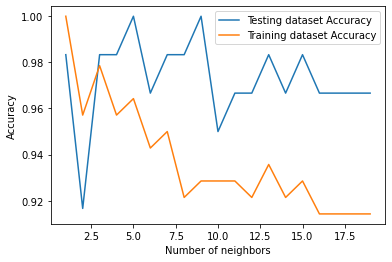

In [243]:
neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm0, train_Y0)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm0, train_Y0)
    knn_test_accuracy[i] = knn.score(x_test_knorm0, test_Y0)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [245]:

knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(x_train_knorm0, train_Y0)

# Predict on dataset which model has not seen before
knn_predict_train_0 = knn_5.predict(x_train_knorm0)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y0, knn_predict_train_0))
print('\nClassification Report')
print(classification_report(train_Y0, knn_predict_train_0))
print("\nAccuracy Score on train set:")
print(knn_5.score(x_train_knorm0, train_Y0))
 
# Predict on dataset which model has not seen before
knn_predict_test0 = knn_5.predict(x_test_knorm0)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y0, knn_predict_test0))
print('\nClassification Report')
print(classification_report(test_Y0, knn_predict_test0))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm0, test_Y0))

# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, knn_predict_test0), 3)
 
print("AUC for our sample data is {}". format(auc0))

recall_sensitivity = metrics.recall_score(test_Y0, knn_predict_test0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, knn_predict_test0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[54  0]
 [ 5 81]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        54
           1       1.00      0.94      0.97        86

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140


Accuracy Score on train set:
0.9642857142857143
Confusion Matrix for Test data:
[[18  0]
 [ 0 42]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


#### Data 1

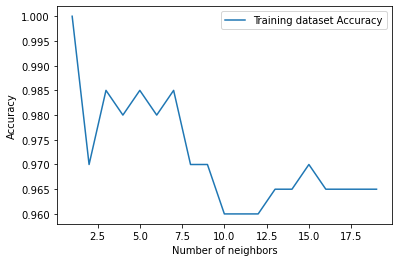

In [246]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
kidney_X1_k1 = kidney_X1.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
kidney_X1_knorm1 = min_max_scaler.fit_transform(kidney_X1_k1)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(kidney_X1_k1, kidney_y1)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(kidney_X1_k1, kidney_y1)
 
# Generate plot
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [247]:
knn_10 = KNeighborsClassifier(n_neighbors=10)

backward_sfs = SequentialFeatureSelector(knn_10, n_features_to_select=0.2, 
                          direction='backward', scoring= 'accuracy', cv=5, n_jobs=-1).fit(kidney_X1, kidney_y1)

In [248]:
kidney_X1knn = backward_sfs.transform(kidney_X1)

In [249]:
kidney_X1knn.shape

(200, 25)

In [250]:
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[backward_sfs.get_support()]}"
)

Features selected by forward sequential selection: Index(['specific_gravity_1.009 - 1.011', 'hemoglobin_15.2 - 16.5',
       'packed_cell_volume_≥ 49.1', 'red_blood_cell_count_5.05 - 5.64',
       'red_blood_cell_count_5.64 - 6.23',
       'glomerular_filtration_rate_152.446 - 177.612',
       'glomerular_filtration_rate_177.612 - 202.778',
       'glomerular_filtration_rate_76.949 - 102.115', 'stage_s2', 'stage_s5',
       'age_35 - 43', 'age_66 - 74', 'age_< 12', 'age_≥ 74', 'affected',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'pedal_edema', 'anemia'],
      dtype='object')


In [251]:
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(kidney_X1knn, kidney_y1, test_size=0.3, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X1.shape)
print("Magnitude of the target training features:", train_Y1.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X1.shape)
#print("Magnitude of the target validation features:", validation_Y1.shape)
print("\nMagnitude of the descriptive test features:", test_X1.shape)
print("Magnitude of the target test features:", test_Y1.shape)


Magnitude of the descriptive training features: (140, 25)
Magnitude of the target training features: (140,)

Magnitude of the descriptive test features: (60, 25)
Magnitude of the target test features: (60,)


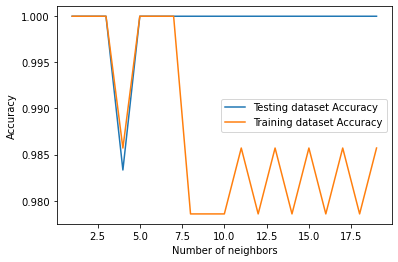

In [254]:
neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X1, train_Y1)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(train_X1, train_Y1)
    knn_test_accuracy[i] = knn.score(test_X1, test_Y1)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [256]:

knn_6 = KNeighborsClassifier(n_neighbors=6)

knn_6.fit(train_X1, train_Y1)

# Predict on dataset which model has not seen before
knn_predict_train_1 = knn_6.predict(train_X1)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y1, knn_predict_train_1))
print('\nClassification Report')
print(classification_report(train_Y1, knn_predict_train_1))
print("\nAccuracy Score on train set:")
print(knn_6.score(train_X1, train_Y1))
 
# Predict on dataset which model has not seen before
knn_predict_test1 = knn_6.predict(test_X1)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y1, knn_predict_test1))
print('\nClassification Report')
print(classification_report(test_Y1, knn_predict_test1))
print("\nAccuracy Score on test set:")
print(knn_6.score(test_X1, test_Y1))

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, knn_predict_test1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, knn_predict_test1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, knn_predict_test1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[54  0]
 [ 0 86]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140


Accuracy Score on train set:
1.0
Confusion Matrix for Test data:
[[18  0]
 [ 0 42]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


#### Data 2

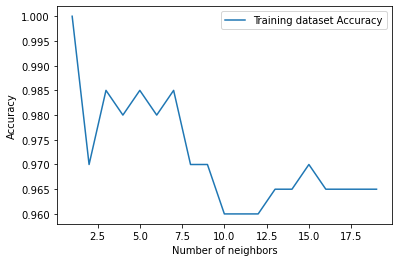

In [257]:
neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(kidney_X2, kidney_y2)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(kidney_X2, kidney_y2)
 
# Generate plot
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [258]:
knn_10 = KNeighborsClassifier(n_neighbors=10)

forward_sfs = SequentialFeatureSelector(knn_10, n_features_to_select=0.8, 
                          direction='forward', scoring= 'accuracy', cv=5, n_jobs=-1).fit(kidney_X2, kidney_y2)

In [259]:
kidney_X2_knn = forward_sfs.transform(kidney_X2)
kidney_X2_knn.shape

(200, 102)

In [260]:
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[forward_sfs.get_support()]}"
)

Features selected by forward sequential selection: Index(['specific_gravity_1.009 - 1.011', 'specific_gravity_1.015 - 1.017',
       'specific_gravity_1.019 - 1.021', 'specific_gravity_< 1.007',
       'specific_gravity_≥ 1.023', 'albumin_1 - 1', 'albumin_2 - 2',
       'albumin_3 - 3', 'albumin_< 0', 'albumin_≥ 4',
       ...
       'glomerular_filtration_rate_177.612 - 202.778',
       'glomerular_filtration_rate_202.778 - 227.944',
       'glomerular_filtration_rate_76.949 - 102.115',
       'glomerular_filtration_rate_≥ 227.944', 'stage_s5', 'age_12 - 20',
       'age_20 - 27', 'age_27 - 35', 'age_35 - 43', 'affected'],
      dtype='object', length=102)


In [261]:
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(kidney_X2_knn, kidney_y2, test_size=0.3, random_state=1234)
#test_X2, validation_X2, test_Y2, validation_Y2 = train_test_split(val_X2, val_Y2, test_size=0.5, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X2.shape)
print("Magnitude of the target training features:", train_Y2.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X2.shape)
#print("Magnitude of the target validation features:", validation_Y2.shape)
print("\nMagnitude of the descriptive test features:", test_X2.shape)
print("Magnitude of the target test features:", test_Y2.shape)


Magnitude of the descriptive training features: (140, 102)
Magnitude of the target training features: (140,)

Magnitude of the descriptive test features: (60, 102)
Magnitude of the target test features: (60,)


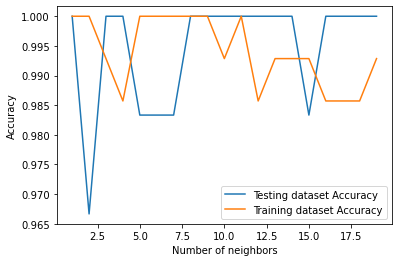

In [262]:
neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X2, train_Y2)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(train_X2, train_Y2)
    knn_test_accuracy[i] = knn.score(test_X2, test_Y2)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [263]:

knn_10 = KNeighborsClassifier(n_neighbors=10)

knn_10.fit(train_X2, train_Y2)

# Predict on dataset which model has not seen before
knn_predict_train_2 = knn_10.predict(train_X2)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y2, knn_predict_train_2))
print('\nClassification Report')
print(classification_report(train_Y2, knn_predict_train_2))
print("\nAccuracy Score on train set:")
print(knn_10.score(train_X2, train_Y2))
 
# Predict on dataset which model has not seen before
knn_predict_test2 = knn_10.predict(test_X2)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y2, knn_predict_test2))
print('\nClassification Report')
print(classification_report(test_Y2, knn_predict_test2))
print("\nAccuracy Score on test set:")
print(knn_10.score(test_X2, test_Y2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, knn_predict_test2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, knn_predict_test2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, knn_predict_test2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[54  0]
 [ 1 85]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.99      0.99        86

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140


Accuracy Score on train set:
0.9928571428571429
Confusion Matrix for Test data:
[[18  0]
 [ 0 42]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


## Machine Learning Algorithm: Support Vector Machines

In [265]:
# Baseline dataframe

# train the model on train set
svm_model =  svm.SVC()
svm_model.fit(train_X0, train_Y0)
 
# print prediction results
print('Train data results:\n')
svm_prediction0 = svm_model.predict(train_X0)
print(classification_report(train_Y0, svm_prediction0))

print('Test data results:\n')
svm_prediction0 = svm_model.predict(test_X0)
print(classification_report(test_Y0, svm_prediction0))


recall_sensitivity = metrics.recall_score(test_Y0, svm_prediction0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, svm_prediction0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


#### Data 1

In [266]:
svm_model =  svm.SVC()

In [267]:
backward_sfs = SequentialFeatureSelector(svm_model, n_features_to_select=0.2, 
                          direction='backward', scoring= 'accuracy', cv=5, n_jobs=-1).fit(kidney_X1, kidney_y1)

In [268]:
kidney_X1svm = backward_sfs.transform(kidney_X1)

In [269]:
kidney_X1svm.shape

(200, 25)

In [270]:
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[backward_sfs.get_support()]}"
)

Features selected by forward sequential selection: Index(['stage_s2', 'stage_s3', 'stage_s4', 'stage_s5', 'age_12 - 20',
       'age_20 - 27', 'age_27 - 35', 'age_35 - 43', 'age_43 - 51',
       'age_51 - 59', 'age_59 - 66', 'age_66 - 74', 'age_< 12', 'age_≥ 74',
       'affected', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps',
       'bacteria', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia'],
      dtype='object')


In [271]:
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(kidney_X1svm, kidney_y1, test_size=0.3, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X1.shape)
print("Magnitude of the target training features:", train_Y1.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X1.shape)
#print("Magnitude of the target validation features:", validation_Y1.shape)
print("\nMagnitude of the descriptive test features:", test_X1.shape)
print("Magnitude of the target test features:", test_Y1.shape)


Magnitude of the descriptive training features: (140, 25)
Magnitude of the target training features: (140,)

Magnitude of the descriptive test features: (60, 25)
Magnitude of the target test features: (60,)


In [272]:
# Dataframe 1

# Baseline data

# train the model on train set
svm_model.fit(train_X1, train_Y1)
 
# print prediction results
print('Train data results:\n')
svm_prediction1 = svm_model.predict(train_X1)
print(classification_report(train_Y1, svm_prediction1))

print('Test data results:\n')
svm_prediction1 = svm_model.predict(test_X1)
print(classification_report(test_Y1, svm_prediction1))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y1, svm_prediction1), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y1, svm_prediction1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, svm_prediction1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


#### Data 2

In [274]:
svm_model =  svm.SVC()

forward_sfs = SequentialFeatureSelector(svm_model, n_features_to_select=0.8, 
                          direction='backward', scoring= 'accuracy', cv=5, n_jobs=-1).fit(kidney_X2, kidney_y2)

In [275]:
kidney_X2svm = forward_sfs.transform(kidney_X2)

In [276]:
kidney_X2svm.shape

(200, 102)

In [277]:
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[backward_sfs.get_support()]}"
)

Features selected by forward sequential selection: Index(['stage_s2', 'stage_s3', 'stage_s4', 'stage_s5', 'age_12 - 20',
       'age_20 - 27', 'age_27 - 35', 'age_35 - 43', 'age_43 - 51',
       'age_51 - 59', 'age_59 - 66', 'age_66 - 74', 'age_< 12', 'age_≥ 74',
       'affected', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps',
       'bacteria', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia'],
      dtype='object')


In [278]:
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(kidney_X2svm, kidney_y2, test_size=0.3, random_state=1234)
#test_X2, validation_X2, test_Y2, validation_Y2 = train_test_split(val_X2, val_Y2, test_size=0.5, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X2.shape)
print("Magnitude of the target training features:", train_Y2.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X2.shape)
#print("Magnitude of the target validation features:", validation_Y2.shape)
print("\nMagnitude of the descriptive test features:", test_X2.shape)
print("Magnitude of the target test features:", test_Y2.shape)


Magnitude of the descriptive training features: (140, 102)
Magnitude of the target training features: (140,)

Magnitude of the descriptive test features: (60, 102)
Magnitude of the target test features: (60,)


In [279]:
# Dataframe 2

# Baseline data

# train the model on train set
svm_model.fit(train_X2, train_Y2)
 
# print prediction results
print('Train data results:\n')
svm_prediction2 = svm_model.predict(train_X2)
print(classification_report(train_Y2, svm_prediction2))

print('Test data results:\n')
svm_prediction2 = svm_model.predict(test_X2)
print(classification_report(test_Y2, svm_prediction2))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y2, svm_prediction2), 3)
 
print("AUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y2, svm_prediction2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, svm_prediction2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


## Machine Learning Algorithm: Logistic Regression

In [280]:
# define model
lr_model = LogisticRegression()

### Dataframe baseline

In [282]:
# fitting model
lr_model.fit(train_X0, train_Y0)

# Predict on dataset which model has not seen before
lr_train_predict0 = lr_model.predict(train_X0)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0, lr_train_predict0))
print('\nClassification Report')
print(classification_report(train_Y0, lr_train_predict0))
print("\nAccuracy Score on train set:")
print(lr_model.score(train_X0, train_Y0))

# Predict on dataset which model has not seen before
lr_test_predict0 = lr_model.predict(test_X0)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0, lr_test_predict0))
print('\nClassification Report')
print(classification_report(test_Y0, lr_test_predict0))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X0, test_Y0))

# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, lr_test_predict0), 3)
 
print("AUC for our sample data is {}". format(auc0))

recall_sensitivity = metrics.recall_score(test_Y0, lr_test_predict0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, lr_test_predict0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140


Accuracy Score on train set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score o

#### Data 1

In [283]:
lr_model = LogisticRegression()

In [284]:
backward_sfs = SequentialFeatureSelector(lr_model, n_features_to_select=0.2, 
                          direction='backward', scoring= 'accuracy', cv=5, n_jobs=-1).fit(kidney_X1, kidney_y1)

In [285]:
kidney_X1lr = backward_sfs.transform(kidney_X1)

In [286]:
kidney_X1lr.shape

(200, 25)

In [287]:
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[backward_sfs.get_support()]}"
)

Features selected by forward sequential selection: Index(['stage_s2', 'stage_s3', 'stage_s4', 'stage_s5', 'age_12 - 20',
       'age_20 - 27', 'age_27 - 35', 'age_35 - 43', 'age_43 - 51',
       'age_51 - 59', 'age_59 - 66', 'age_66 - 74', 'age_< 12', 'age_≥ 74',
       'affected', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps',
       'bacteria', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia'],
      dtype='object')


In [288]:
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(kidney_X1lr, kidney_y1, test_size=0.3, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X1.shape)
print("Magnitude of the target training features:", train_Y1.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X1.shape)
#print("Magnitude of the target validation features:", validation_Y1.shape)
print("\nMagnitude of the descriptive test features:", test_X1.shape)
print("Magnitude of the target test features:", test_Y1.shape)


Magnitude of the descriptive training features: (140, 25)
Magnitude of the target training features: (140,)

Magnitude of the descriptive test features: (60, 25)
Magnitude of the target test features: (60,)


In [289]:
lr_model.fit(train_X1, train_Y1) # fitting baseline model

# Predict on train dataset which model has not seen before
lr_train_predict1 = lr_model.predict(train_X1)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1, lr_train_predict1))
print('\nClassification Report')
print(classification_report(train_Y1, lr_train_predict1))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X1, train_Y1))

# Predict on dataset which model has not seen before
lr_test_predict1 = lr_model.predict(test_X1)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1, lr_test_predict1))
print('\nClassification Report')
print(classification_report(test_Y1, lr_test_predict1))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X1, test_Y1))

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, lr_test_predict1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, lr_test_predict1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, lr_test_predict1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on

#### Data 2

In [290]:
lr_model = LogisticRegression()

In [291]:
forward_sfs = SequentialFeatureSelector(lr_model, n_features_to_select=0.8, 
                          direction='backward', scoring= 'accuracy', cv=5, n_jobs=-1).fit(kidney_X2, kidney_y2)

In [292]:
kidney_X2lr = forward_sfs.transform(kidney_X2)

In [293]:
kidney_X2lr.shape

(200, 102)

In [294]:
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[backward_sfs.get_support()]}"
)

Features selected by forward sequential selection: Index(['stage_s2', 'stage_s3', 'stage_s4', 'stage_s5', 'age_12 - 20',
       'age_20 - 27', 'age_27 - 35', 'age_35 - 43', 'age_43 - 51',
       'age_51 - 59', 'age_59 - 66', 'age_66 - 74', 'age_< 12', 'age_≥ 74',
       'affected', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps',
       'bacteria', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia'],
      dtype='object')


In [295]:
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(kidney_X2lr, kidney_y2, test_size=0.3, random_state=1234)
#test_X2, validation_X2, test_Y2, validation_Y2 = train_test_split(val_X2, val_Y2, test_size=0.5, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X2.shape)
print("Magnitude of the target training features:", train_Y2.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X2.shape)
#print("Magnitude of the target validation features:", validation_Y2.shape)
print("\nMagnitude of the descriptive test features:", test_X2.shape)
print("Magnitude of the target test features:", test_Y2.shape)


Magnitude of the descriptive training features: (140, 102)
Magnitude of the target training features: (140,)

Magnitude of the descriptive test features: (60, 102)
Magnitude of the target test features: (60,)


In [296]:
lr_model.fit(train_X2, train_Y2) # fitting baseline model

# Predict on train dataset which model has not seen before
lr_train_predict2 = lr_model.predict(train_X2)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2, lr_train_predict2))
print('\nClassification Report')
print(classification_report(train_Y2, lr_train_predict2))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X2, train_Y2))

# Predict on dataset which model has not seen before
lr_test_predict2 = lr_model.predict(test_X2)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2, lr_test_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, lr_test_predict2))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X2, test_Y2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, lr_test_predict2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, lr_test_predict2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, lr_test_predict2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on

## Machine Learning Algorithm: Multilayer Perceptron (MLP) Classifier

In [298]:
# define model
mlp_model = MLPClassifier()

MLP classifier does not need the implementation of any feature selection methods since it magically feature selects by itself.

### Dataframe baseline

In [300]:
# fitting model
mlp_model.fit(train_X0, train_Y0)

# Predict on dataset which model has not seen before
mlp_predict0 = mlp_model.predict(train_X0)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0, mlp_predict0))
print('\nClassification Report')
print(classification_report(train_Y0, mlp_predict0))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X0, train_Y0))

# Predict on dataset which model has not seen before
mlp_predict0 = mlp_model.predict(test_X0)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0, mlp_predict0))
print('\nClassification Report')
print(classification_report(test_Y0, mlp_predict0))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X0, test_Y0))

# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, mlp_predict0), 3)
 
print("AUC for our sample data is {}". format(auc0))

recall_sensitivity = metrics.recall_score(test_Y0, mlp_predict0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, mlp_predict0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140


Accuracy Score on train set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score o

In [309]:
mlp_model.fit(train_X1, train_Y1)

# Predict on dataset which model has not seen before
mlp_predict1 = mlp_model.predict(train_X1)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1, mlp_predict1))
print('\nClassification Report')
print(classification_report(train_Y1, mlp_predict1))
print("\nAccuracy Score on test set:")
print(mlp_model.score(train_X1, train_Y1))

# Predict on dataset which model has not seen before
mlp_predict1 = mlp_model.predict(test_X1)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1, mlp_predict1))
print('\nClassification Report')
print(classification_report(test_Y1, mlp_predict1))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X1, test_Y1))

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, mlp_predict1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, mlp_predict1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, mlp_predict1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on

In [302]:
mlp_model.fit(train_X2, train_Y2) # fitting baseline model

# Predict on train dataset which model has not seen before
mlp_predict2 = mlp_model.predict(train_X2)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2, mlp_predict2))
print('\nClassification Report')
print(classification_report(train_Y2, mlp_predict2))
print("\nAccuracy Score on test set:")
print(mlp_model.score(train_X2, train_Y2))

# Predict on dataset which model has not seen before
mlp_predict2 = mlp_model.predict(test_X2)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2, mlp_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, mlp_predict2))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X2, test_Y2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, mlp_predict2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, mlp_predict2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, mlp_predict2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[18  0]
 [ 1 41]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.98      0.99        42

    accuracy                           0.98        60
   macro avg       0.97      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60


Accuracy Score on test set:
0.9833333333333333
AUC for our sample data is 0.988
Sensitivity Score on test data: 0.97619

In [304]:
mlp_model.fit(train_X2, train_Y2) # fitting baseline model

# Predict on train dataset which model has not seen before
mlp_predict2 = mlp_model.predict(train_X2)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2, mlp_predict2))
print('\nClassification Report')
print(classification_report(train_Y2, mlp_predict2))
print("\nAccuracy Score on test set:")
print(mlp_model.score(train_X2, train_Y2))

# Predict on dataset which model has not seen before
mlp_predict2 = mlp_model.predict(test_X2)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2, mlp_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, mlp_predict2))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X2, test_Y2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, mlp_predict2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, mlp_predict2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, mlp_predict2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[17  1]
 [ 1 41]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.98      0.98      0.98        42

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60


Accuracy Score on test set:
0.9666666666666667
AUC for our sample data is 0.96
Sensitivity Score on test data: 0.976190

In [307]:
mlp_model.fit(train_X2, train_Y2) # fitting baseline model

# Predict on train dataset which model has not seen before
mlp_predict2 = mlp_model.predict(train_X2)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2, mlp_predict2))
print('\nClassification Report')
print(classification_report(train_Y2, mlp_predict2))
print("\nAccuracy Score on test set:")
print(mlp_model.score(train_X2, train_Y2))

# Predict on dataset which model has not seen before
mlp_predict2 = mlp_model.predict(test_X2)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2, mlp_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, mlp_predict2))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X2, test_Y2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, mlp_predict2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, mlp_predict2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, mlp_predict2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[17  1]
 [ 1 41]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.98      0.98      0.98        42

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60


Accuracy Score on test set:
0.9666666666666667
AUC for our sample data is 0.96
Sensitivity Score on test data: 0.976190